<h2 style="text-align: center;""> Name - Prasad Vijaykumar Pandit </h2>


<h1 style="text-align: center; color:#FF4500; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 48px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2);">Bank Marketing - Capstone Project</h1>

----------------

#### Sources:
- Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012

#### Relevant Information:
- The data is related with direct marketing campaigns of a Portuguese banking institution.  
- The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,   
   in order to access if the product (bank term deposit) would be (or not) subscribed.   

#### Goal:   
- The classification goal is to predict if the client will subscribe a term deposit (variable y).

<br>

<h1 style="text-align: left; color:#32CD32"> Imported Libraries:</h1>

In [1]:
import pandas as pd, numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time

from IPython.utils.io import capture_output

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.utils import shuffle, resample
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import ADASYN, RandomOverSampler
from sklearn.feature_selection import RFE, SelectKBest, f_classif

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.utils.validation import check_is_fitted

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

<h1 style="text-align: left; color:#32CD32">1. Data Exploration and Cleaning</h1>

<h3 style="text-align: left; color:#4682B4">
    Task 1: Load the dataset into a pandas DataFrame and display the first few rows.
</h3>

In [2]:
df = pd.read_csv(r"G:\Data Science Eduminds\Projects\Banking\Banking.csv", sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<h3 style="text-align: left; color:#4682B4">
    Task 2: Summarize the dataset by providing basic statistics (mean, median, mode, standard deviation, etc.).
</h3>

In [3]:
# Show the shape of the dataset:
df.shape

(45211, 17)

In [4]:
# Show info about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [831]:
df['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

In [5]:
# Show basic details (mean, median, mode, standard deviation) about numeric features in a dataset:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Several features (duration, campaign, pdays, previous) have outliers and we either need to drop them or convert the feature to binary.

In [6]:
df.corr(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<h3 style="text-align: left; color:#4682B4">
    Task 3: Identify and handle missing values. Explain the chosen method for handling them.
</h3>

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

We can see that there is no typical null/missing value present in any of the feature.  
But after analyzing the dataset we noticed that there are missing values such as unknown.  
Those are only present in categorical features so, we'll fill handle them using Iterative Imputer.  

In [8]:
# Select the categorical features first:
# cat_features = df.drop('y', axis=1).select_dtypes(include=object).columns

# Find No. of Unique Values, what are unique values and the percentage of null/missing values in all the features except continuous data:
total_cols = df.drop(['pdays', 'balance', 'duration'], axis=1).columns
unique_values = {}
for col in total_cols:
    unique_values[col] = df[col].nunique()

unique_values_df = pd.DataFrame(unique_values.items(), columns=['Features', 'No. of Unique Values'])
unique_values_df['Unique Values'] = [', '.join(map(str, df[col].unique())) for col in total_cols]
unique_values_df['Percent Null'] = [(df[col] == 'unknown').sum() / df.shape[0] * 100 for col in total_cols]
# unique_values_df['Percent Null'] = [(df[col].apply(lambda x: 1 if x.find('unknown')>=0 else 0)).sum()/df.shape[0] for col in cat_features] --> In case of many type of null values.

pd.options.display.max_colwidth = None  # Just to show/display all the values in 'Unique Values' feature
unique_values_df

,Features,No. of Unique Values,Unique Values,Percent Null
0,age,77,"58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32, 25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30, 27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64, 69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86, 95, 81, 18, 89, 84, 87, 92, 93, 88",0.000000
1,job,12,"management, technician, entrepreneur, blue-collar, unknown, retired, admin., services, self-employed, unemployed, housemaid, student",0.637013
2,marital,3,"married, single, divorced",0.000000
3,education,4,"tertiary, secondary, unknown, primary",4.107407
4,default,2,"no, yes",0.000000
5,housing,2,"yes, no",0.000000
6,loan,2,"no, yes",0.000000
7,contact,3,"unknown, cellular, telephone",28.798301
8,day,31,"5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28, 29, 30, 2, 3, 4, 11, 17, 18, 24, 25, 1, 10, 22, 31",0.000000
9,month,12,"may, jun, jul, aug, oct, nov, dec, jan, feb, mar, apr, sep",0.000000


As we can see, that poutcome has 81.75% missing values so it is better to drop this feature rather than filling it.  
For contact we'll try filling it with median first and then compare the model performance with Iterative Imputer.  
For other features such as - education and job we'll use median value to fill first and then after encode we'll try Iterative Imputer.  

<h3 style="text-align: left; color:#4682B4">
    Task 4: Identify and handle duplicate rows if any.
</h3>

In [9]:
df.duplicated().sum()

0

Dataset has no duplicated values

- #### Note - Task 5: Encode categorical features - should be in Feature Engineering, hence added it in respective section.
<br>

<h1 style="text-align: left; color:#32CD32">2. Data Visualization</h1>

<h3 style="text-align: left; color:#4682B4">
    Task 5: Create visualizations to understand the distribution of numerical features (e.g., histograms, box plots).
</h3>


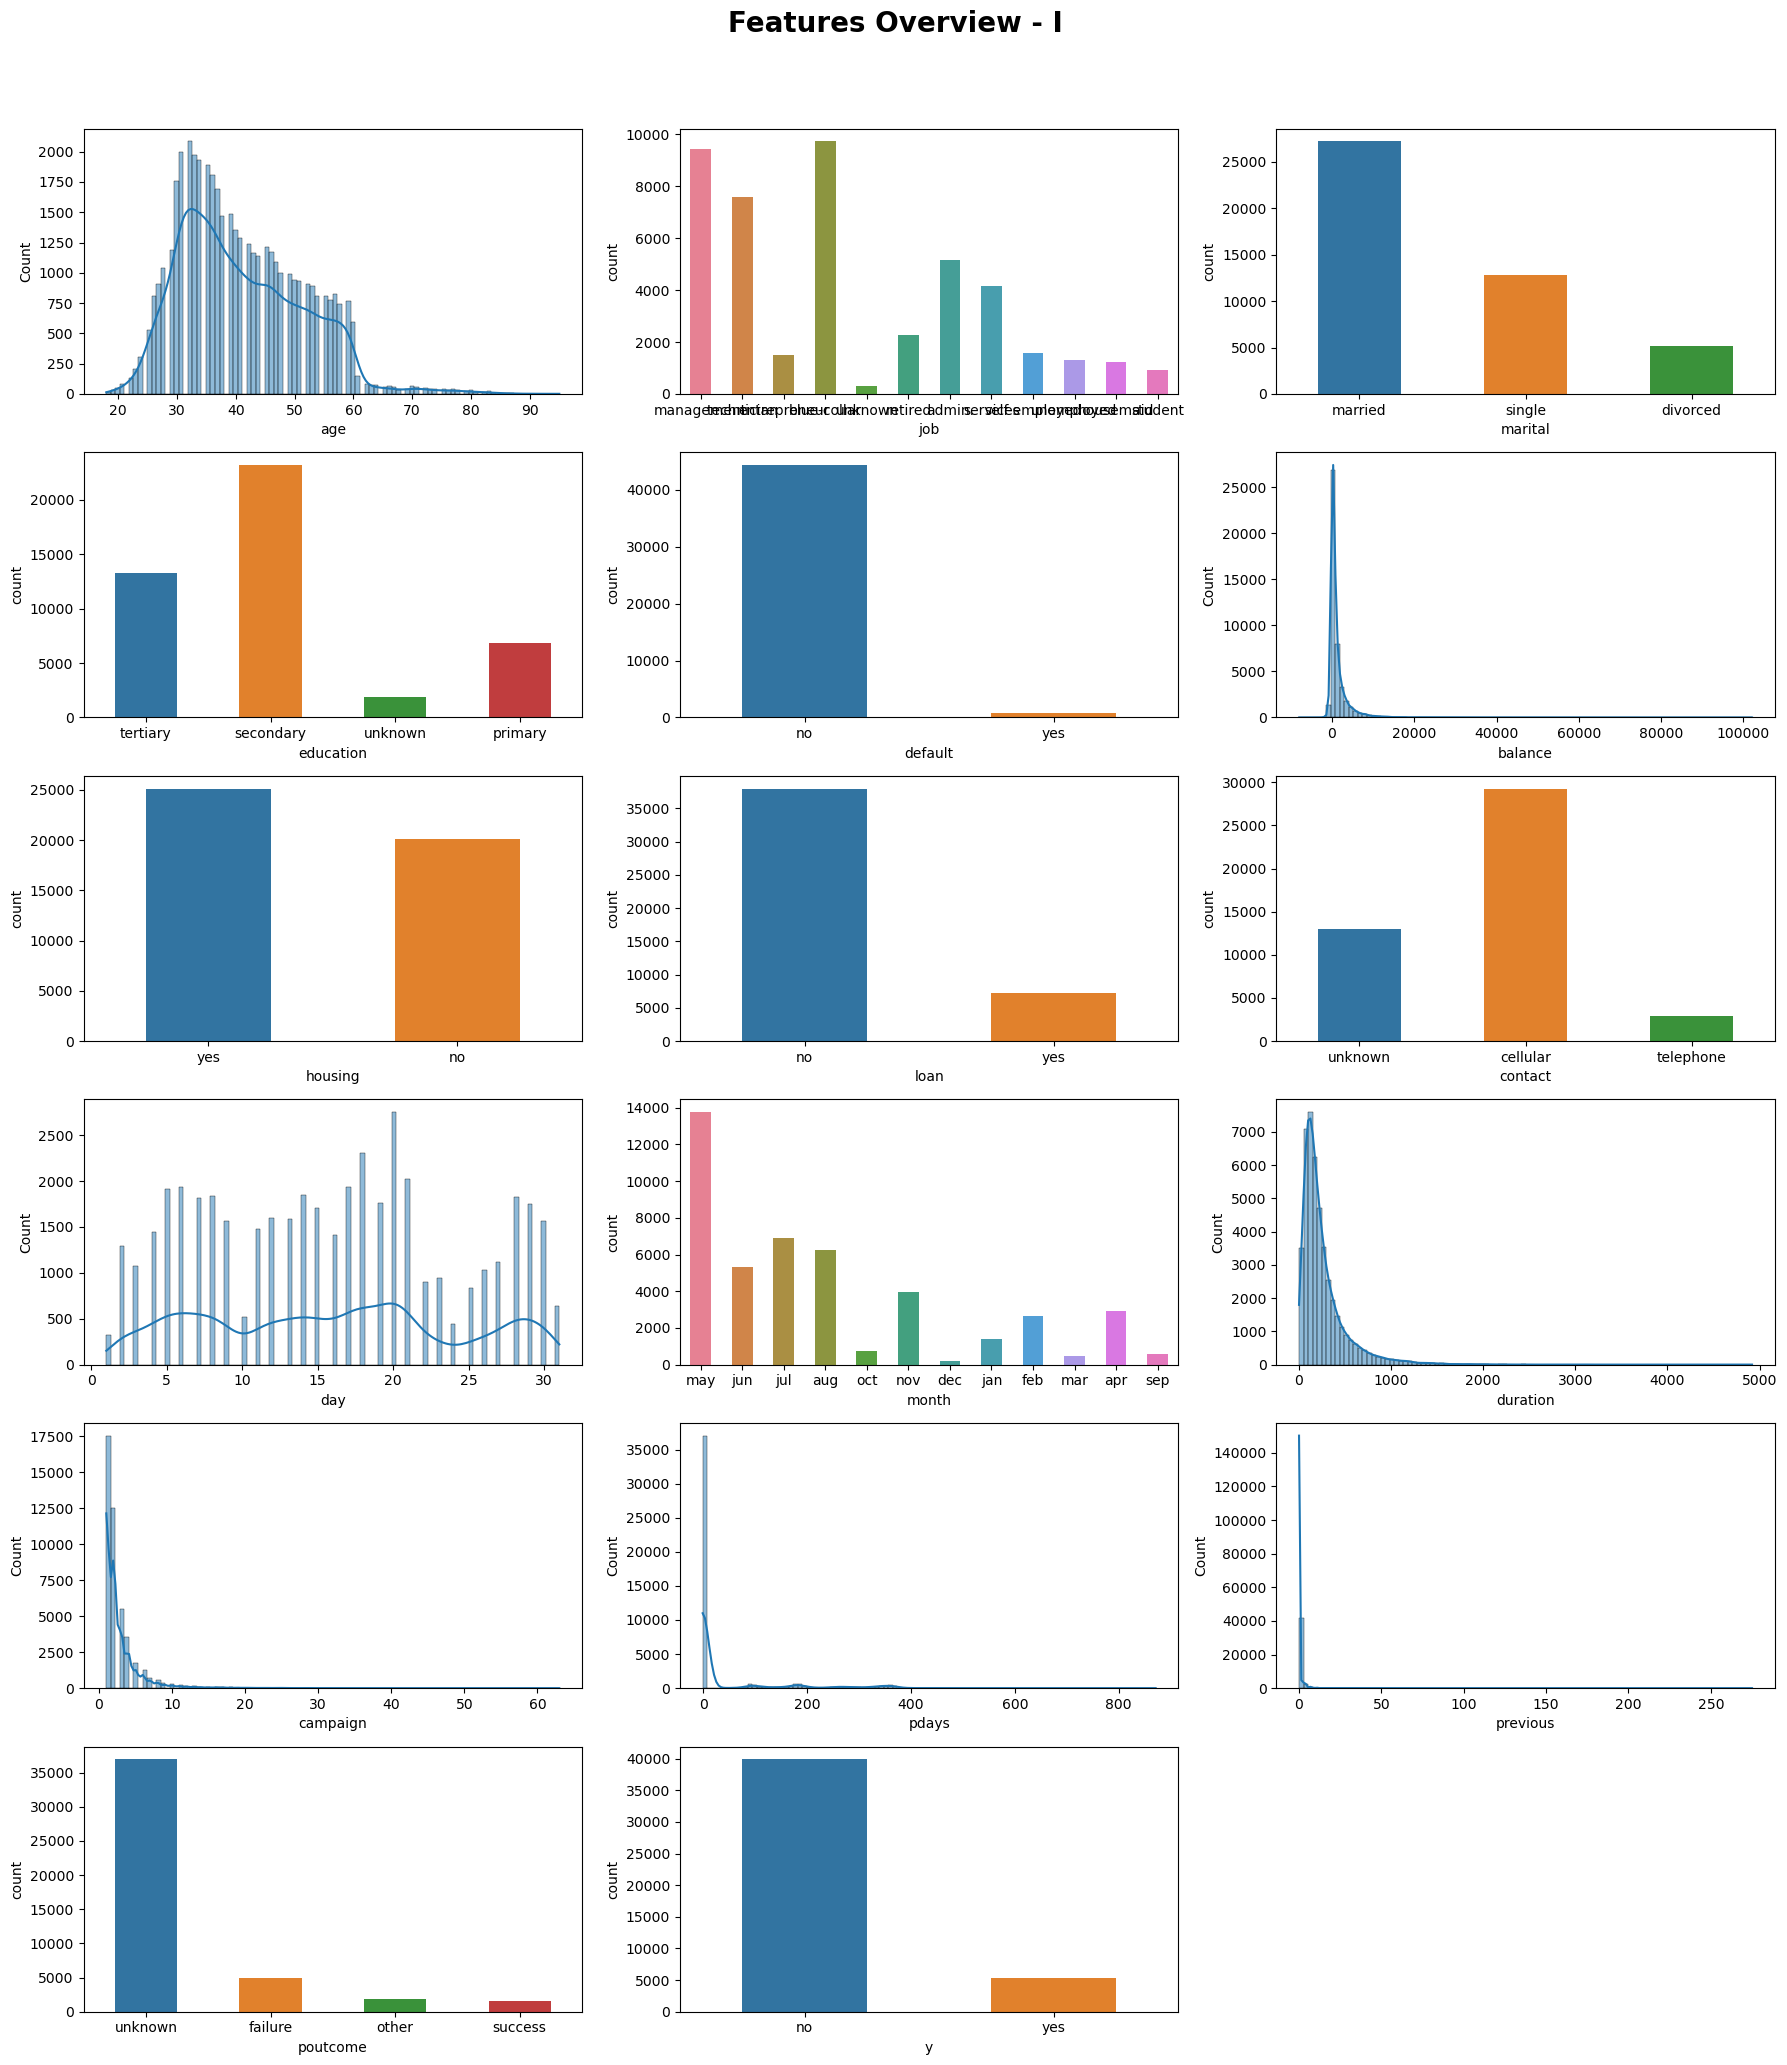

In [10]:
# Rather than separating cat and num features in the starting, we can get the basic overview of the data:

fig, axes = plt.subplots(ncols=3, nrows=np.ceil(len(df.columns) // 3+1).astype(int), figsize=(18, 20)) # Dynamic code for any number of features
fig.suptitle(t='Features Overview - I', fontsize=20, fontweight='bold', y=1.03)

for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    if df[col].dtype == 'object':
        sns.countplot(data=df, x=col, ax=ax, orient='h', hue=col, width=0.5, dodge=False)
    else:
        sns.histplot(df[col], bins=100, ax=ax, kde=True)

for j in range(i+1, len(axes.flatten())):   # --> to remove the empty axes.
    fig.delaxes(axes.flatten()[j])
plt.tight_layout()
plt.show()

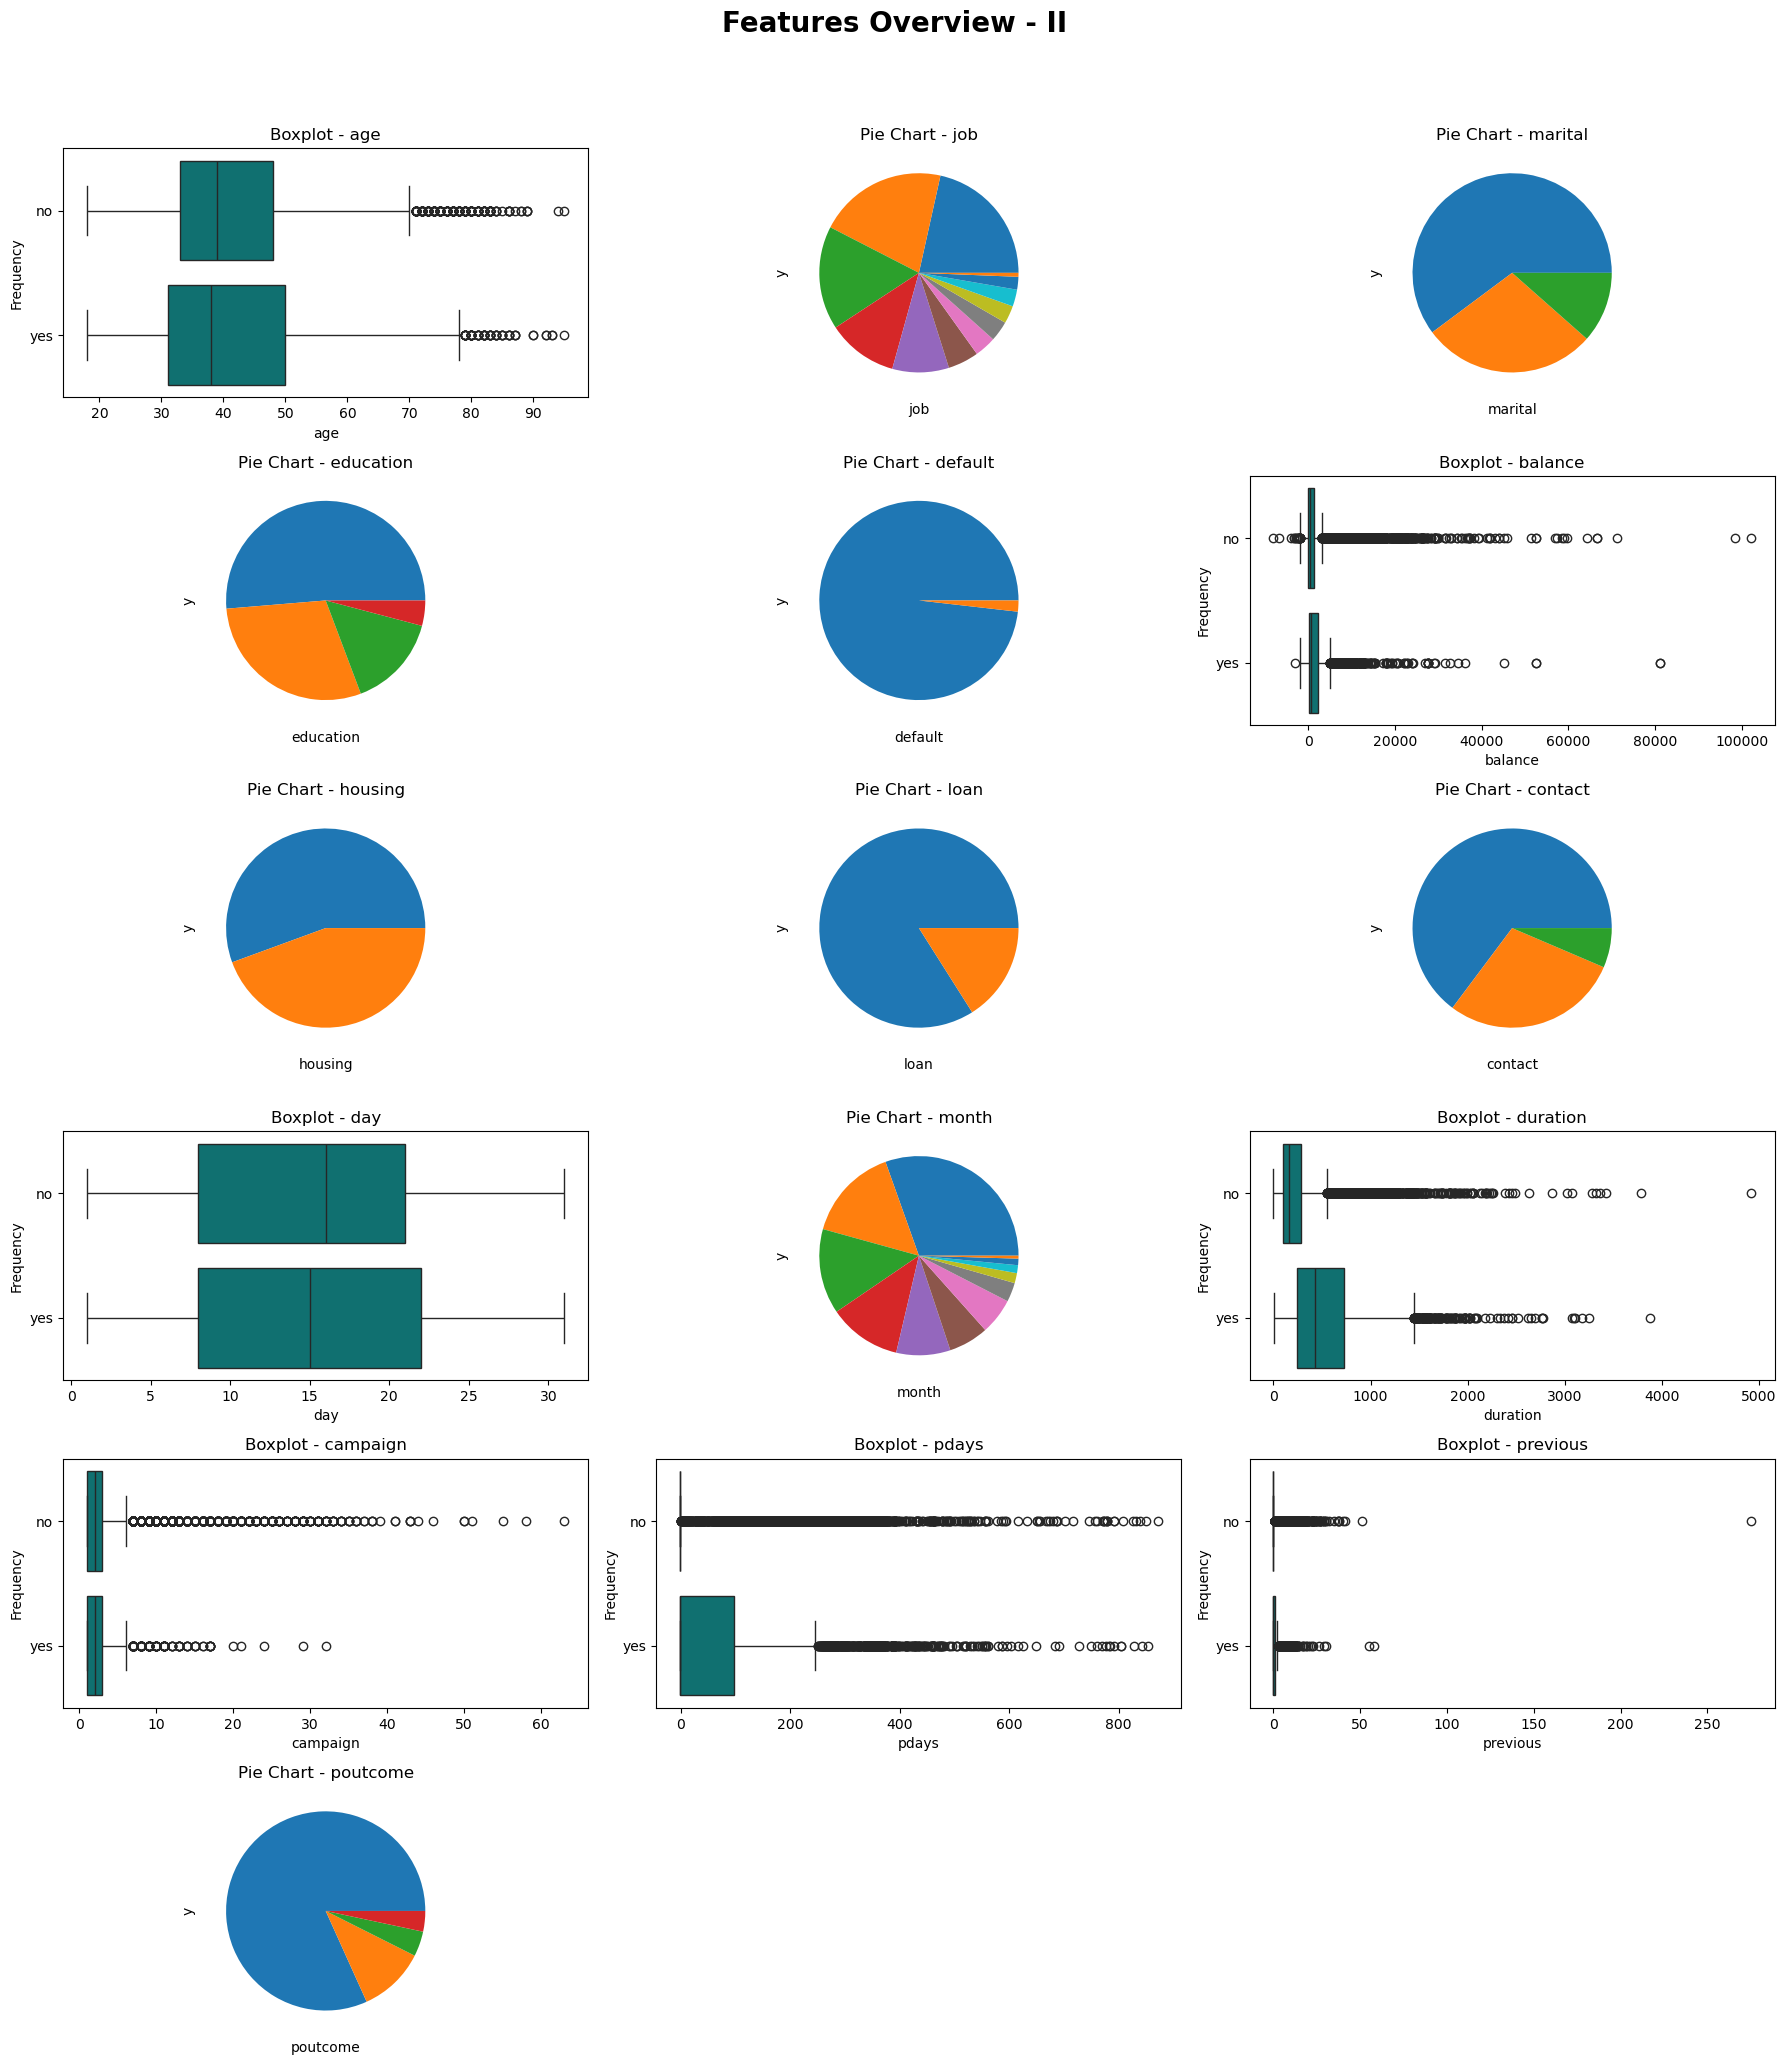

In [11]:
# Used pie chart for cat features and boxen graph for numeric features:
fig, axes = plt.subplots(ncols=3, nrows=(len(df.columns) - 1) // 3 + 1, figsize=(18, 20))
fig.suptitle(t='Features Overview - II', fontsize=20, fontweight='bold', y=1.03)

# Enumerate through columns excluding 'y'
for i, col in enumerate(df.drop('y', axis=1).columns):
    ax = axes[i // 3, i % 3]
    if df[col].dtype == 'object':  # Categorical data -> Boxplot
        # sns.boxplot(x=df[col], y=df['y'], ax=ax)
        ax.pie(df[col].value_counts(), rotatelabels=True)
        ax.set_title(f'Pie Chart - {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('y')
    elif df[col].dtype in ['int64', 'float64']:  # Numeric data -> Histplot
        sns.boxplot(x=df[col], y=df['y'], ax=ax, legend=True, color='Teal')
        ax.set_title(f'Boxplot - {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

# Remove empty subplots if necessary
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


<h3 style="text-align: left; color:#4682B4">
    Task 6: Create visualizations for categorical features (e.g., bar charts, pie charts).
</h3>

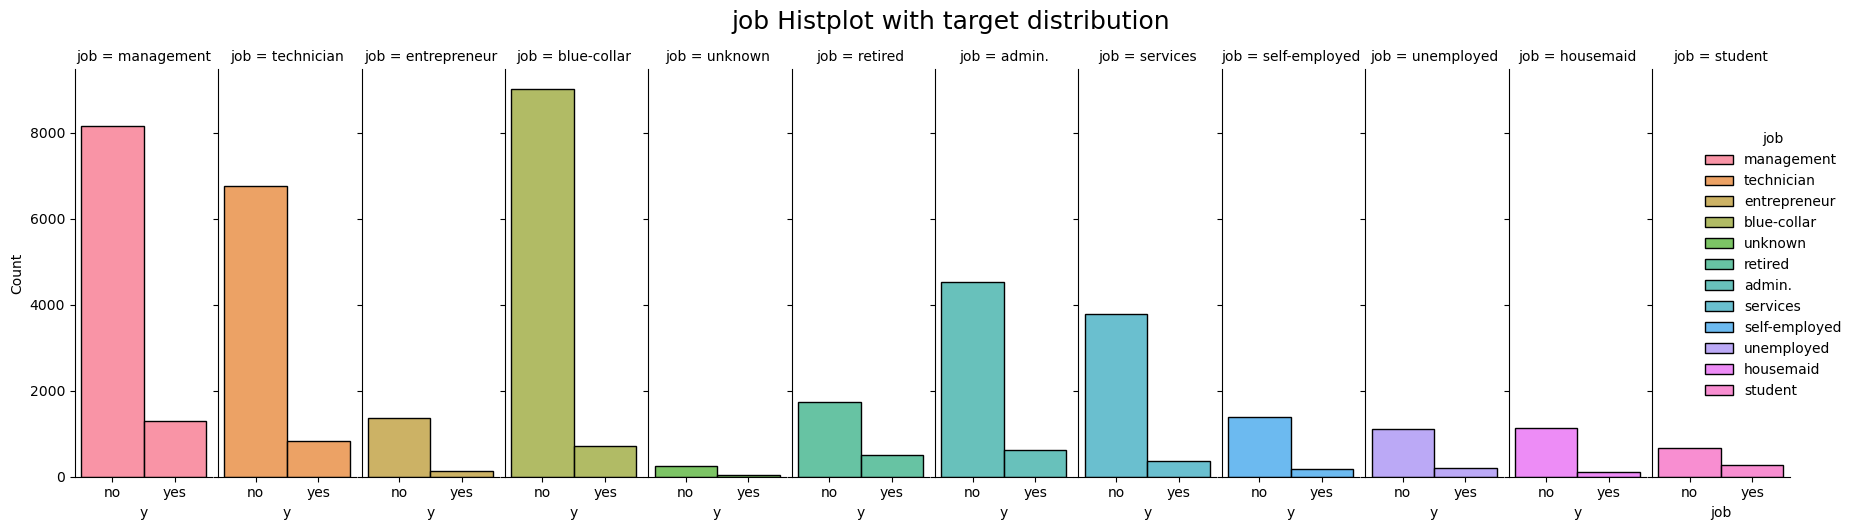

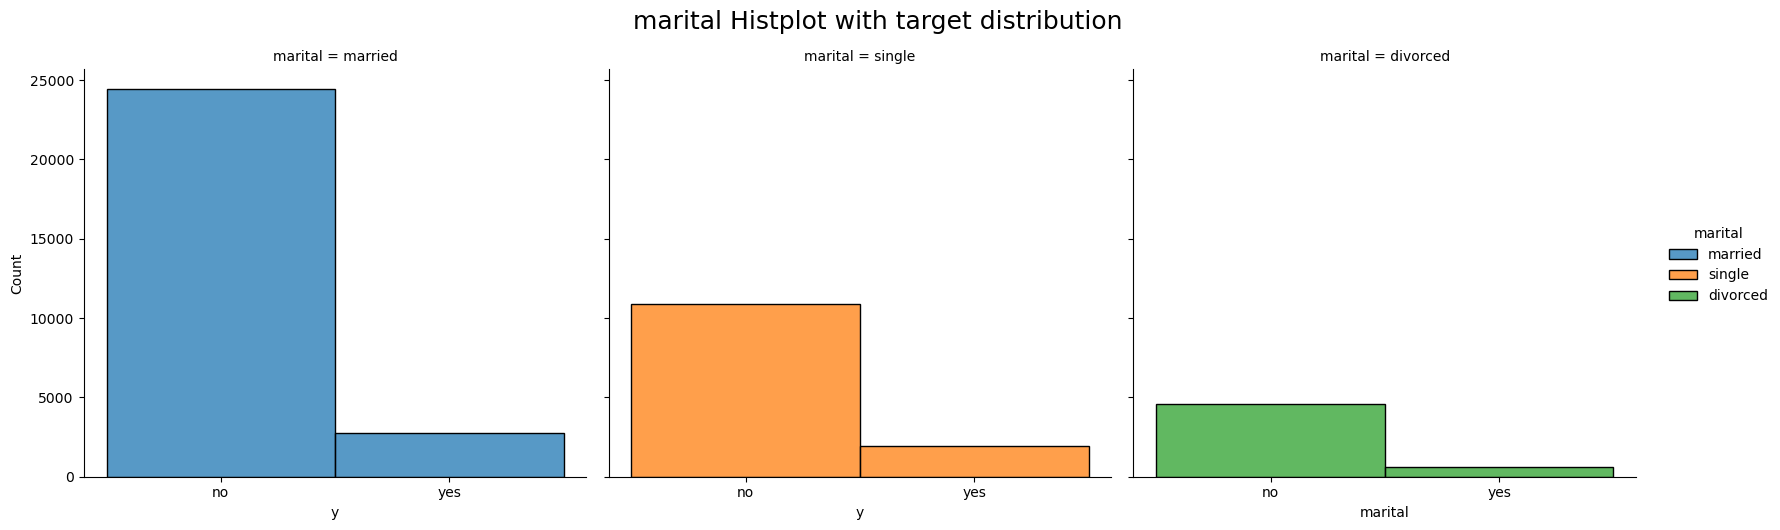

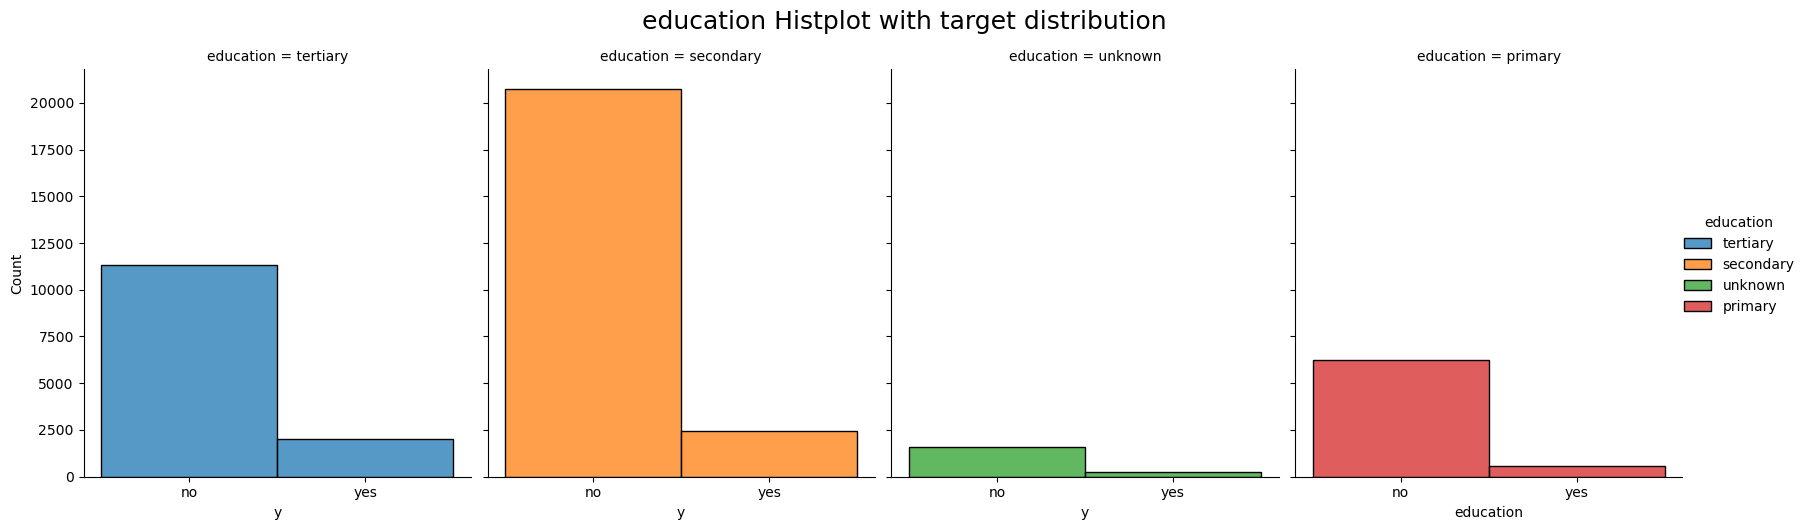

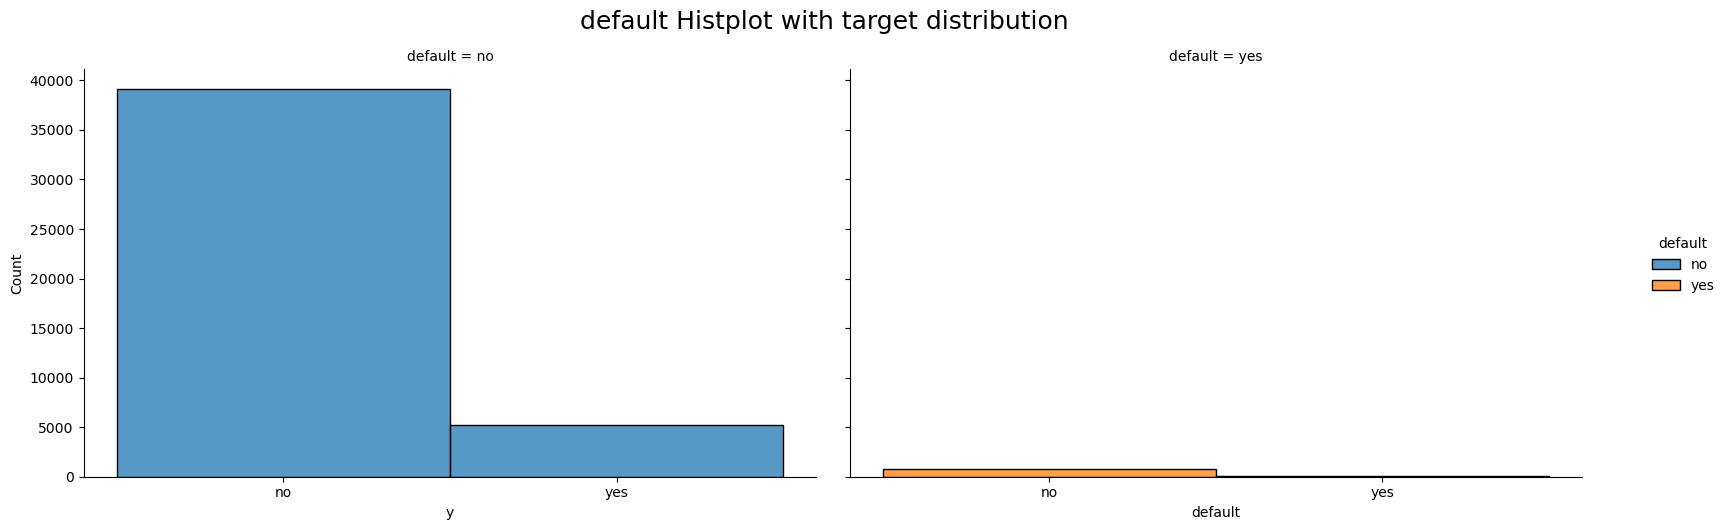

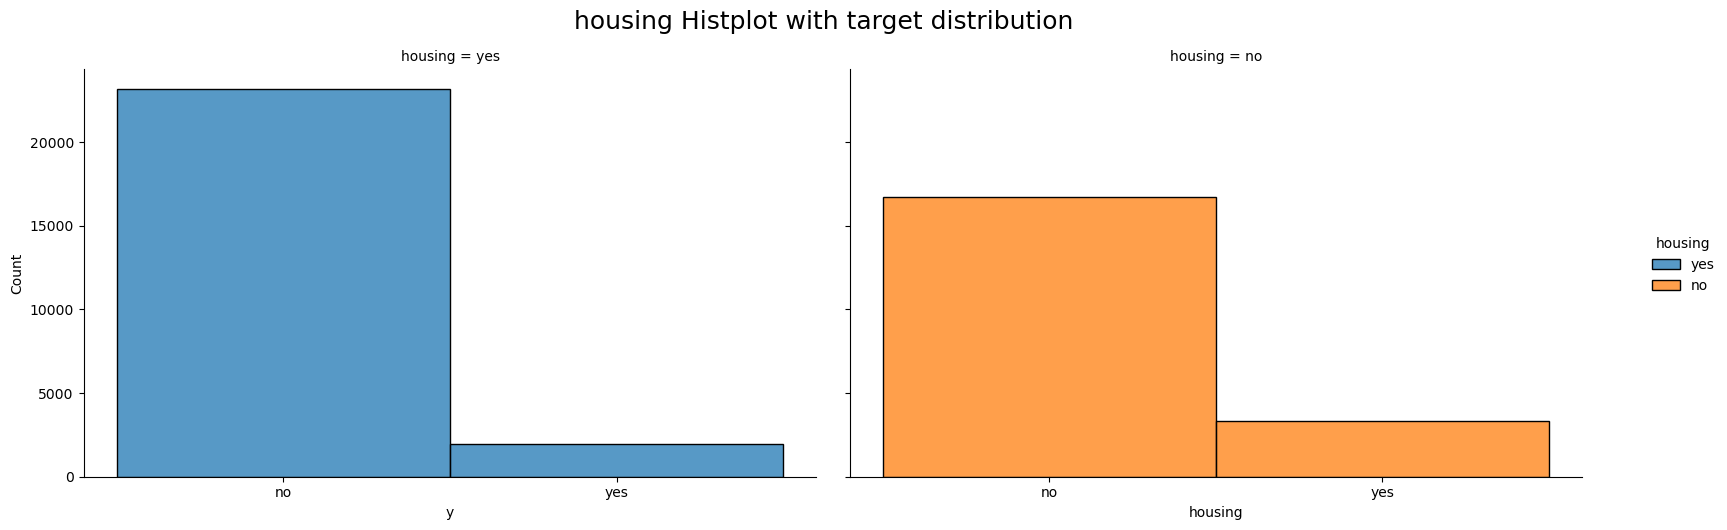

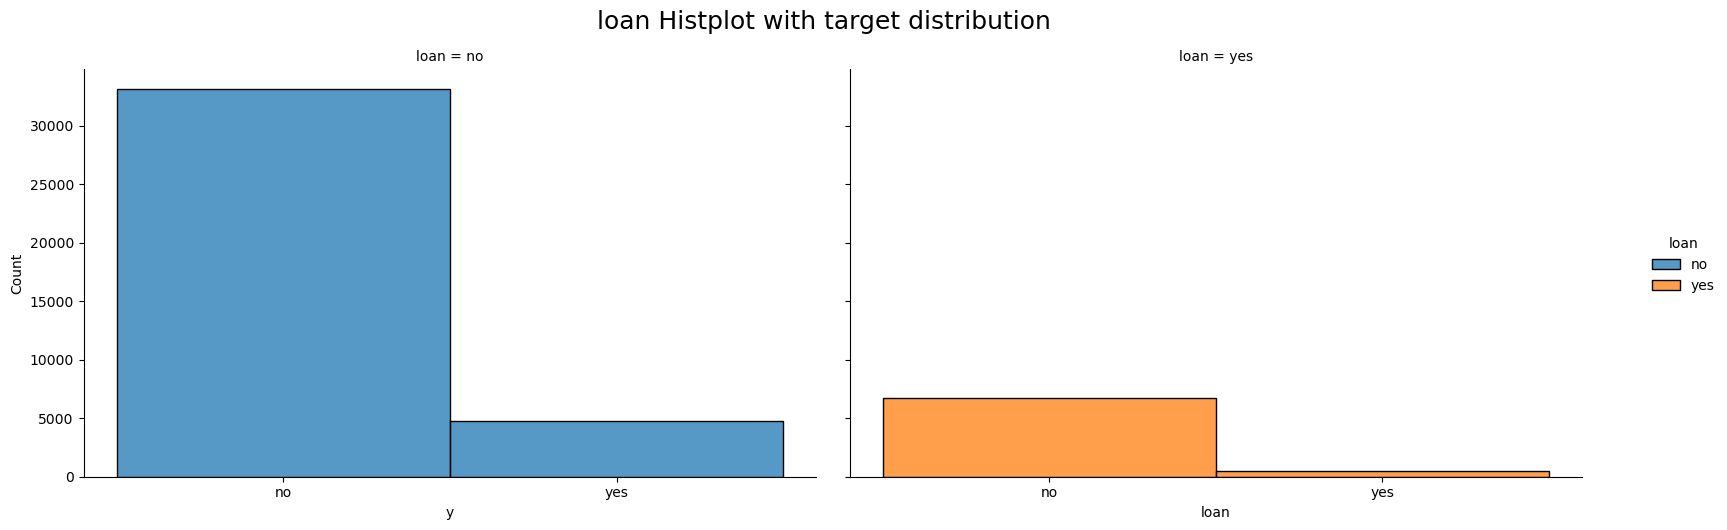

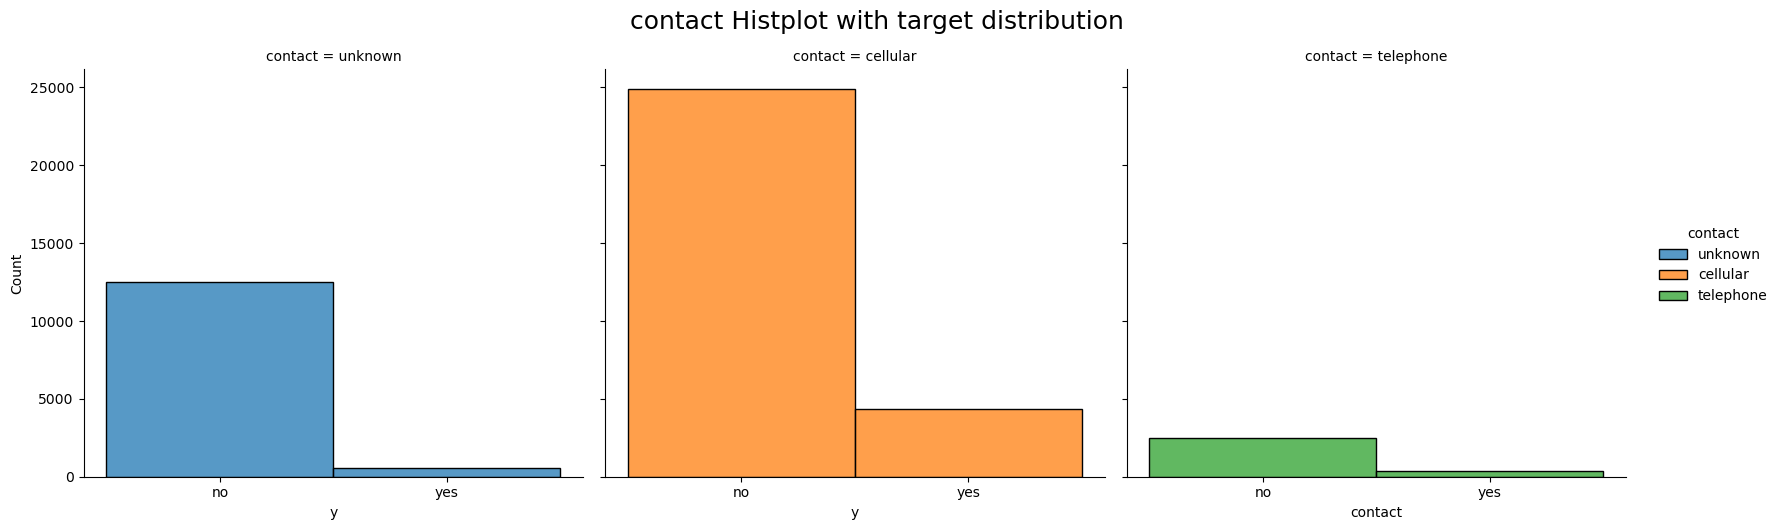

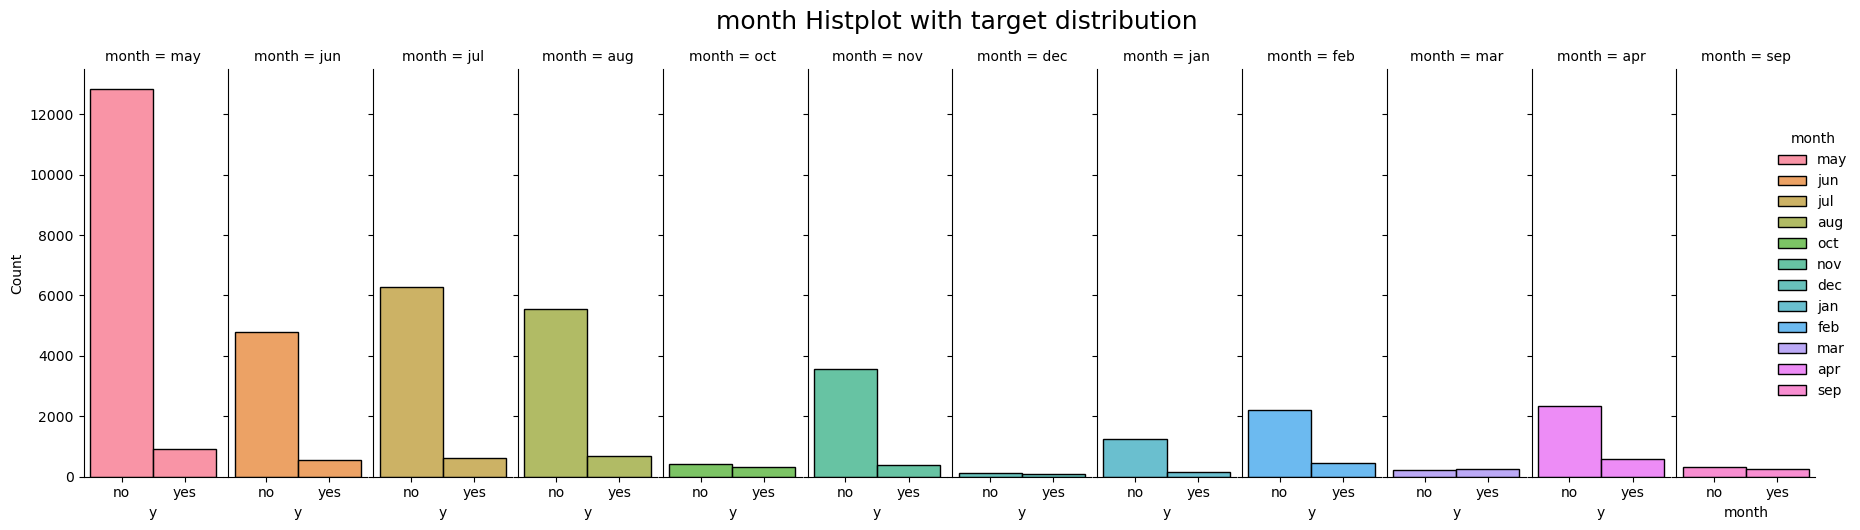

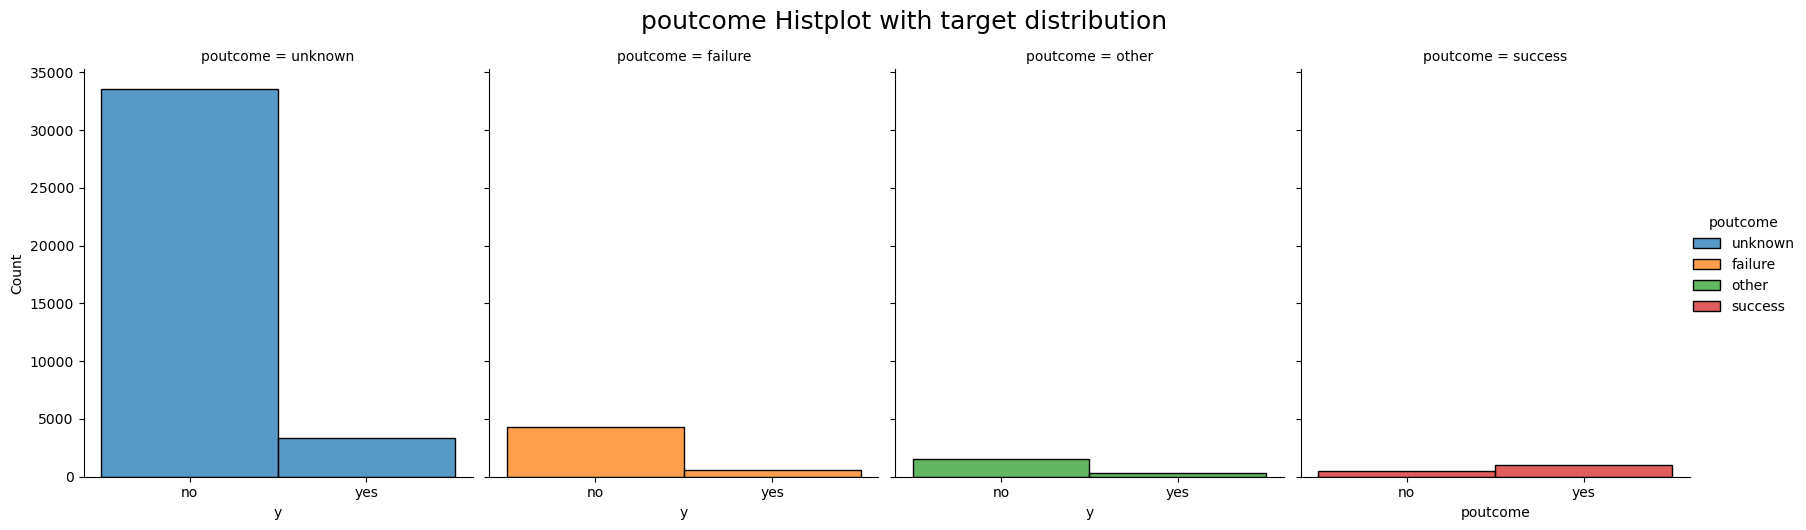

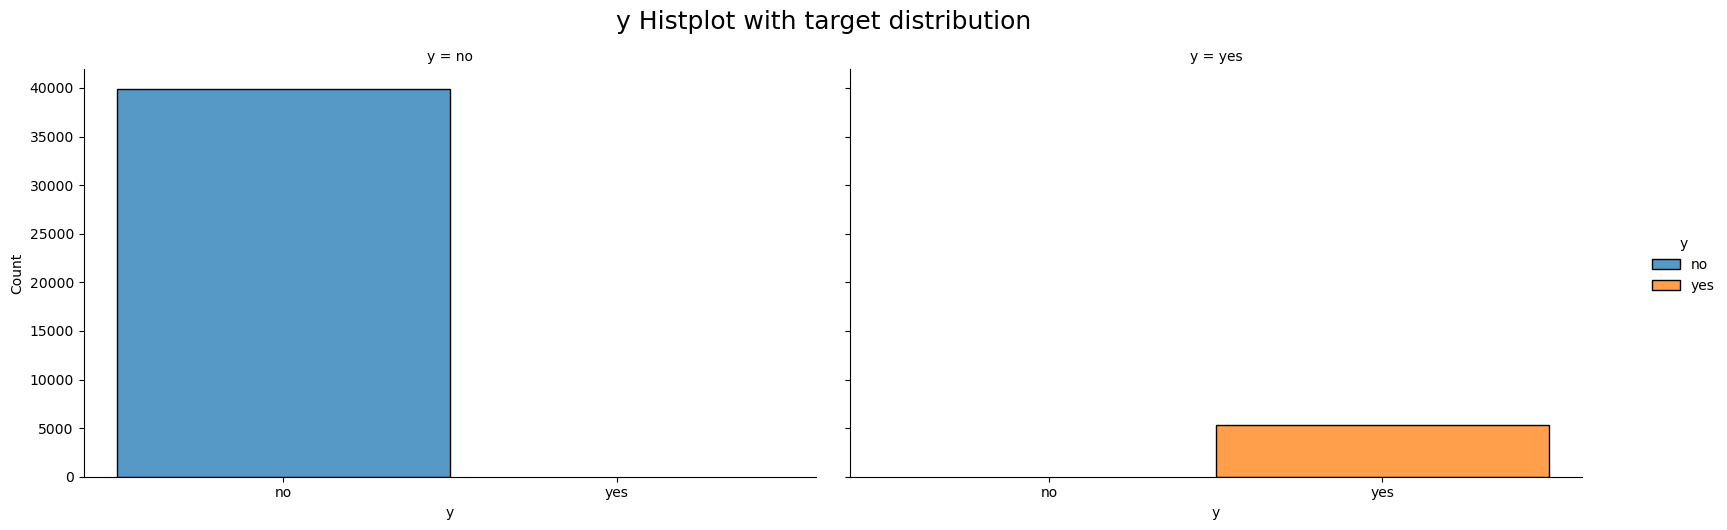

In [12]:
for col in df.select_dtypes(include=object).columns:
    graph = sns.FacetGrid(df, col=col, hue=col, height=5).map(sns.histplot, 'y', binwidth = max(0.1, 20 / df[col].nunique())).add_legend()
    graph.fig.set_size_inches(df[col].nunique()*1.5, 5)
    graph.fig.set_size_inches(18, 5, forward=True)
    plt.suptitle(col + ' Histplot with target distribution', y=1.05, size=18)
    plt.xlabel(col)
    plt.ylabel('Target (y)')
    plt.show()

<h3 style="text-align: left; color:#4682B4">
    Task 7: Use pair plots to visualize relationships between features.
</h3>

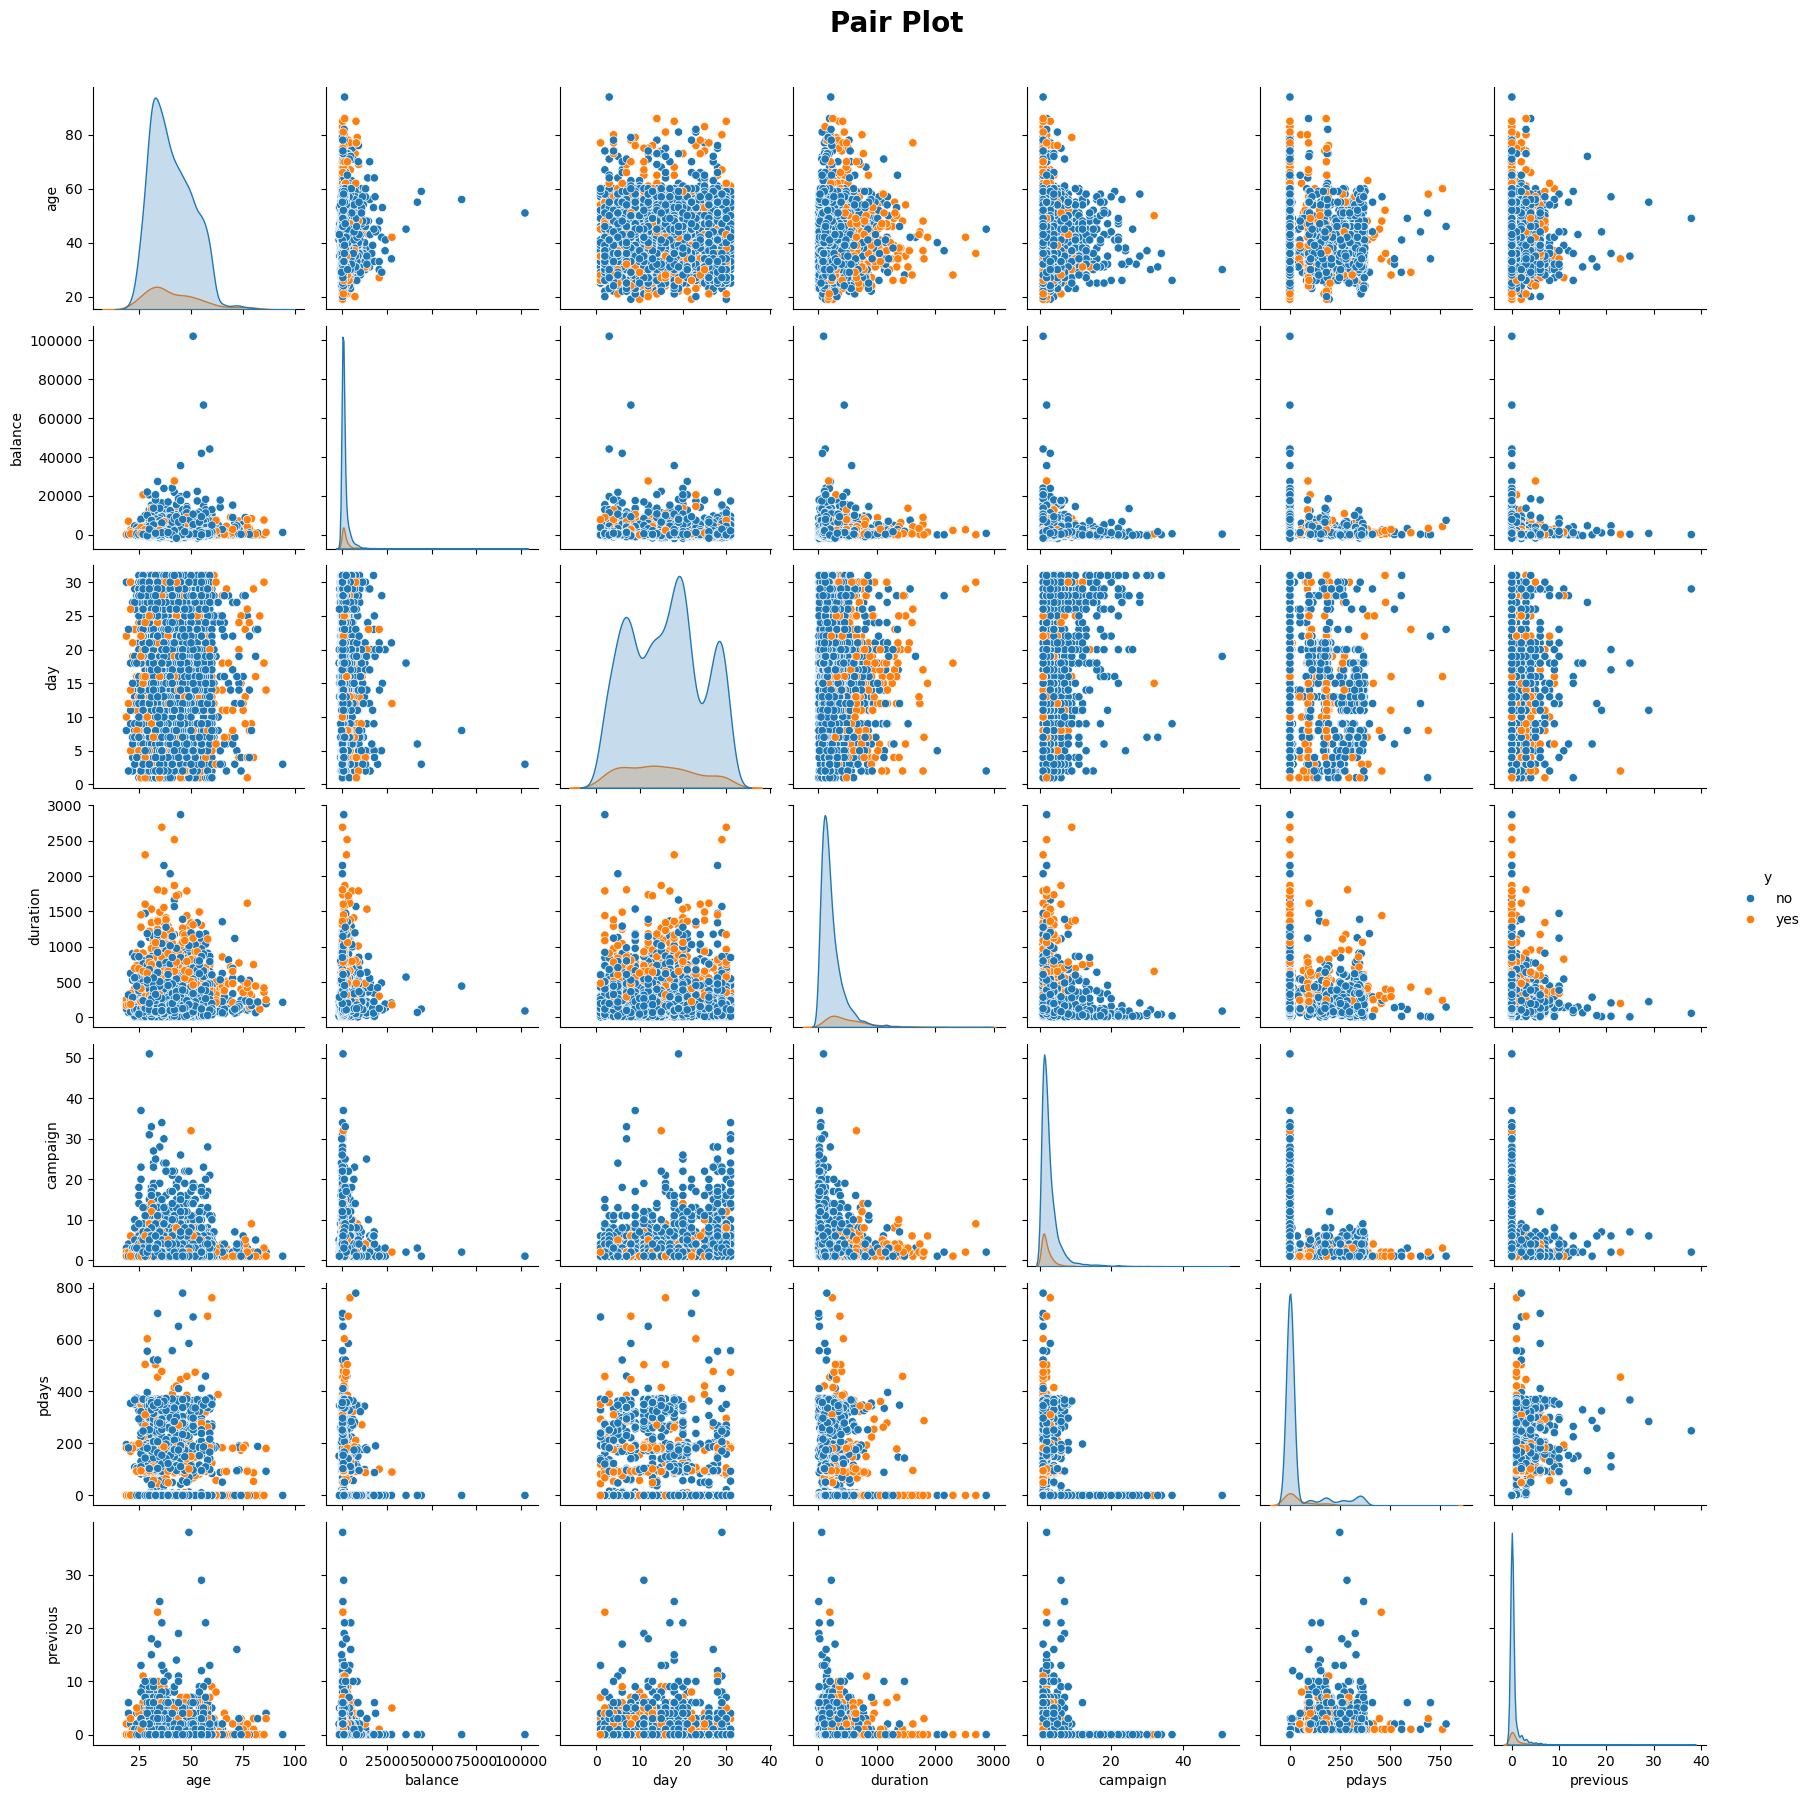

In [13]:
# Using df.sample because it takes lot of time to show the graph:
pair_plot = sns.pairplot(df.sample(frac=0.1), hue='y')
pair_plot.fig.suptitle('Pair Plot', fontsize=20, fontweight='bold', y=1.03)
plt.show()

<h3 style="text-align: left; color:#4682B4">
    Task 8: Correlation heatmap - Should be after Feature engineering and encoding, hence, it is added in respective section.
</h3>

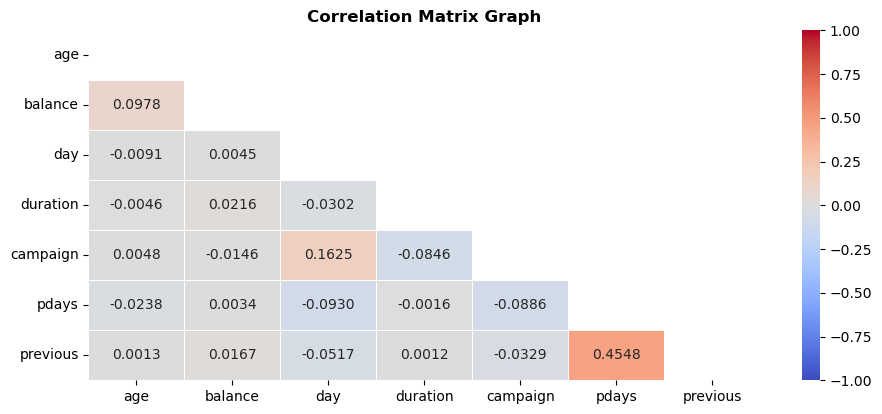

In [14]:
corr_df = df.select_dtypes(include=np.number)
mask = np.triu(np.ones(corr_df.shape[1], dtype='bool'))
plt.figure(figsize=(12,5))
plt.title(label='Correlation Matrix Graph', fontdict= {'fontsize': 12, 'fontweight': 'bold'})
sns.heatmap(corr_df.corr(), vmin=-1, vmax=1, cmap='coolwarm', linewidths=0.5, annot=True, fmt='0.4f', mask=mask, )
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
plt.show()

<h3 style="text-align: left; color:#4682B4">
    Task 9: Replaced 'unknown' missing values using Custom Transformer. -- (Additional Step)
</h3>

In [3]:
class remove_placeholder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.fitted_ = True
        return self

    def transform(self, X):
        check_is_fitted(self, 'fitted_')
        X = X.copy()
        # X.map(lambda x: np.nan if x == 'unknown' else x)
        X.replace(to_replace='unknown', value = pd.to_numeric(np.nan, errors='coerce'), inplace=True)
        # print(f'Placeholder unknown replaced by np.nan.')
        print('\n---------------------------------------------------------------------------------------------')
        # print('\n\n remove_placeholder - head of X: \n',X.head(5))
        print(f'\n\tRemove unknown Placeholder:\t Total Features: {X.shape[1]}\t Total Samples: {X.shape[0]}')
        # print('\n---------------------------------------------------------------------------------------')
        return X

<h3 style="text-align: left; color:#4682B4">
    Task 10: Converted binary Features to 0 or 1 using Custom Transformer. -- (Additional Step)
</h3>

In [4]:
class bin_transform(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.cols = bin_features
        self.fitted_ = True
        return self

    def transform(self, X):
        check_is_fitted(self, 'fitted_')
        X = X.copy()
        # cols = X.columns
        for col in self.cols:
            # X[col] = X[col].map({'yes': 1, 'no': 0, })
            # X[col] = X[col].apply(lambda x: pd.to_numeric(np.nan, errors='coerce') if type(x) == float else 1 if x.lower() == 'yes' else 0 if x.lower() == 'no' else x)
            X[col] = X[col].apply(lambda x: pd.to_numeric(np.nan, errors='coerce') if type(x) == float else 1 if x.lower() == 'yes' else 0)
        
        # print(f'Binary features transformed: {X.columns.to_list()}')
        # print('\n---------------------------------------------------------------------------------------')
        # print('\n\n bin_transform - head of X: \n',X.head(5))
        print(f'\tBinary Transform:\t\t Total Features: {X.shape[1]}\t Total Samples: {X.shape[0]}')
        # print('\n---------------------------------------------------------------------------------------')
        return X

<h3 style="text-align: left; color:#4682B4">
    Task 11: Converted Ordinal Features using Custom Transformer. -- (Additional Step)
</h3>

In [5]:
class ord_transform(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.fitted_ = True
        return self

    def transform(self, X):
        check_is_fitted(self, 'fitted_')
        X = X.copy()
        X['education'] = X['education'].map({'unknown': pd.to_numeric(np.nan, errors='coerce'), 'primary': 1, 'secondary': 2, 'tertiary': 3}).fillna(-1)
        X['month'] = X['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}).fillna(-1)
        # X['job'] = X['job'].map({'management': 0, 'entrepreneur': 1, 'self-employed': 2, 'technician': 3, 'blue-collar': 4, 'admin.': 5, 'services': 6, 'retired': 7, 'unemployed': 8, 'housemaid': 9, 'unknown': 10})
        # print(f'Ordinal features transformed: {['education', 'month']}')
        # print('\n---------------------------------------------------------------------------------------')
        # print('\n\n ord_transform - head of X: \n',X.head(5))
        print(f'\tOrdinary Feature Transform:\t Total Features: {X.shape[1]}\t Total Samples: {X.shape[0]}')
        # print('\n---------------------------------------------------------------------------------------')
        return X

<h1 style="text-align: left; color:#32CD32">3. Feature Engineering</h1>

<font face="Segoe UI" size="3">
    <span style="font-weight: italic; color:#FF6347;">
        Note: &nbsp;
    </span>
    All below transformations will be applied after Train-Test Split only to avoid Data Leakage issue.
</font>

<h3 style="text-align: left; color:#4682B4">
    Task 12: Create new features that might be useful for the analysis (e.g., date-related features from timestamps, interaction terms).
</h3>

In [6]:
class create_features(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.num_cols = None
        self.cat_cols = None

    def fit(self, X, y=None):
        self.num_cols = X.select_dtypes(np.number).columns
        self.cat_cols = X.select_dtypes(object).columns
        # print(f'num_cols in create_features :{self.num_cols}')
        # print(f'cat_cols in create_features :{self.cat_cols}')
        self.fitted_ = True
        return self

    def transform(self, X):
        check_is_fitted(self, 'fitted_')
        self.num_cols = X.select_dtypes(np.number).columns
        self.cat_cols = X.select_dtypes(object).columns
        X_new = X.copy()
        #######################################################
        # print('Total cat features: ', len(self.cat_cols))
        # print('Total num features: ', len(self.num_cols))
        # total_features = []
        # new_cols = {}
        # for i, i_col in enumerate(self.num_cols):
        #     for j, j_col in enumerate(self.num_cols):
        #         if j > i:
        #             new_cols[f'{i_col}_{j_col}'] = X[i_col] * X[j_col]
        #             # print(f'{i_col}_{j_col} feature added to X')
        #             total_features.append(f'{i_col}_{j_col}')
 
        # for i, i_col in enumerate(self.cat_cols):
        #     for j, j_col in enumerate(self.cat_cols):
        #         if j > i:
        #             new_cols[f'{i_col}_{j_col}'] = X[i_col] + X[j_col]
        #             # print(f'{i_col}_{j_col} feature added to X')
        #             total_features.append(f'{i_col}_{j_col}')
        #######################################################

        today = dt.datetime.today()
        X_new['days_since_last_contact'] = X[['day', 'month']].apply(
            lambda x: (today - dt.datetime(year=today.year - 1, month=int(x['month']), day=int(x['day']))).days,axis=1)
        
        # print('No. of total features added: ', len(total_features)+1)
        # # print('Total features added: ', total_features, 'days_since_last_contact')

        # new_cols_df = pd.DataFrame(new_cols, columns=new_cols.keys(), index=X_new.index)
        # print('Does index of new_cols_df and X_new matches:', X_new.index.equals(new_cols_df.index))

        ########################################### One-Hot Encode for new interaction features ###################################
        # ohe = OneHotEncoder(drop='first', handle_unknown='ignore', max_categories=50, min_frequency=0.1)
        # ohe.fit(new_cols_df)
        # ohe_data = ohe.transform(new_cols_df)
        # new_cols_df = (pd.DataFrame(ohe_data.toarray(), columns=ohe.get_feature_names_out()))
        # new_cols_df = new_cols_df.dropna(axis=1, how='all')
        # print('X_new.shape: ', X_new.shape)  # Expect (7088, n_features)
        # print('new_cols_df.shape: ', new_cols_df.shape)  # Expect (7088, m_features)
        # X_new = X_new.join(new_cols_df)
        ###########################################       F1-score: 0.4286       ###########################################

        ########################################### Frequency Encode for new interaction features ###################################
        # new_cat_cols = new_cols_df.select_dtypes(object).columns
        # for col in new_cat_cols:
        #     freq_encoding = new_cols_df[col].value_counts() / len(new_cols_df)
        #     new_cols_df[col] = new_cols_df[col].map(freq_encoding)
        # X_new = X_new.join(new_cols_df)
        ###########################################       F1-score: 0.2031       ###########################################

        ########################################### Label Encode for new interaction features ###################################
        # new_cat_cols = new_cols_df.select_dtypes(object).columns
        # le = LabelEncoder()
        # for col in new_cat_cols:
        #     new_cols_df[col] = le.fit_transform(new_cols_df[col])
        # X_new = X_new.join(new_cols_df)
        ###########################################       F1-score: 0.4449       ###########################################
        
        # print('\n---------------------------------------------------------------------------------------')
        # print('\n\n create_features - head of X_new: \n',X_new.head(5))
        print(f'\tFeature Engineering:\t\t Total Features: {X_new.shape[1]}\t Total Samples: {X_new.shape[0]}')
        # print('\n---------------------------------------------------------------------------------------')
        return X_new

<h3 style="text-align: left; color:#4682B4">
    Task 13: Standardize or normalize numerical features if needed.
</h3>

In [7]:
class num_transform(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()
        self.cols_to_scale = None
        self.scaled_cols = None
        self.final_df = None

    def fit(self, X, y=None):
        self.total_cols = X.columns.to_list()
        self.cols_to_scale = X.select_dtypes(np.number).columns.to_list()
        self.scaler.fit(X[self.cols_to_scale])
        self.scaled_cols = self.scaler.get_feature_names_out()
        self.fitted_ = True
        return self

    def transform(self, X):
        check_is_fitted(self, 'fitted_')
        X = X.copy()
        index = X[self.cols_to_scale].index
        # print(f'Numerical features before scaling: \n{X.head(2)}')
        X_scaled = self.scaler.transform(X[self.cols_to_scale])
        X_scaled = pd.DataFrame(X_scaled, columns=self.scaled_cols, index=index)
        X_scaled_df = pd.concat([X.drop(self.cols_to_scale, axis=1), X_scaled], axis=1)
        # print(f'Numerical features after scaling: \n{X_scaled_df.columns.to_list()}')
        # print('\n---------------------------------------------------------------------------------------')
        # print('\n\n num_transform - head of X_scaled_df: \n',X_scaled_df.head(5))
        print(f'\tNumerical Feature scaling:\t Total Features: {X_scaled_df.shape[1]}\t Total Samples: {X_scaled_df.shape[0]}')
        # print('\n---------------------------------------------------------------------------------------')
        self.final_df = X_scaled_df
        return X_scaled_df

    def get_feature_names_out(self, input_features=None):
        # Return the feature names after transformation
        if hasattr(self.final_df, 'columns'):
            return self.final_df.columns
        else:
            # return [f"feature_{i}" for i in range(self.final_df.shape[1])]
            temp = [x for x in self.total_cols if x not in self.cols_to_scale]
            temp.extend(self.scaled_cols)
            return temp

<h3 style="text-align: left; color:#4682B4">
    Task 14: Convert categorical variables to numerical values using appropriate encoding techniques.
</h3>

In [8]:

class cat_transform(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
        self.cols_to_en = None
        self.encoded_cols = None
        self.final_df = None

    def fit(self, X, y=None):
        # print(f'in cat_transform fit (X cols are): {X.columns}')
        self.total_cols = X.columns.to_list()
        self.cols_to_en = X.select_dtypes(object).columns
        self.encoder.fit(X[self.cols_to_en])
        self.encoded_cols = self.encoder.get_feature_names_out(self.cols_to_en)
        # print("Categories found during fit: ", self.encoder.categories_)
        self.fitted_ = True
        return self
        
    def transform(self, X):
        check_is_fitted(self, 'fitted_')
        # print(f'in cat_transform transform (X cols are): {X.columns}')
        X = X.copy()
        X_en = self.encoder.transform(X[self.cols_to_en])
        X_en = pd.DataFrame(X_en, columns=self.encoded_cols, index=X.index)
        X_en_df = pd.concat([X.drop(self.cols_to_en, axis=1), X_en], axis=1)
        
        # print('\n---------------------------------------------------------------------------------------')
        # print(f'\n After cat_transform shape:{X_en_df.shape}')
        print(f'\tCategorical Feature Transform:\t Total Features: {X_en_df.shape[1]}\t Total Samples: {X_en_df.shape[0]}')
        # print('\n---------------------------------------------------------------------------------------')
        # print('\n\n cat_transform - head of X_en_df: \n',X_en_df.head(5))
        self.final_df = X_en_df
        return X_en_df

    def get_feature_names_out(self, input_features=None):
        # Return the feature names after transformation
        if hasattr(self.final_df, 'columns'):
            return self.final_df.columns
        else:
            # return [f"feature_{i}" for i in range(self.final_df.shape[1])]
            temp = [x for x in self.total_cols if x not in self.cols_to_en]
            temp.extend(self.encoded_cols)
            return temp

<h3 style="text-align: left; color:#4682B4">
    Task 15: Handle missing values (previously replaced from unknown to np.nan) using Iterative Imputer.
</h3>

In [9]:
class impute_transform(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputer = IterativeImputer(random_state=42)
        self.cols_to_impute = None
        self.feature_names_out_ = None

    def fit(self, X, y=None):
        self.fitted_ = True
        X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
        # print('\n In impute_transform fit\n', X.shape)
        self.imputer.fit(X)
        self.cols_to_impute = preprocessor.get_feature_names_out()
        self.feature_names_out_ = self.cols_to_impute
        return self

    def transform(self, X):
        check_is_fitted(self, 'fitted_')
        X = X.copy()
        X = pd.DataFrame(X, columns=self.cols_to_impute)
        # print(f'\n Before Imputer X shape:{X.shape}')
        X_imputed = self.imputer.transform(X)

        X_imputed_df = pd.DataFrame(X_imputed, columns=self.feature_names_out_)        
        # print(f'Imputation done for features: \n{self.imputer.get_feature_names_out()}')
        # print('\n---------------------------------------------------------------------------------------')
        # print('\n\n impute_transform - head of X_imputed_df: \n',X_imputed_df.head(5))
        # print(f'\n After Imputer shape:{X_imputed_df.shape}')
        # print(f'\n Null values:{X_imputed_df.isnull().sum()}')
        print(f'\tImputed Dataset:\t\t Total Features: {X_imputed_df.shape[1]}\t Total Samples: {X_imputed_df.shape[0]}')
        # print('\n---------------------------------------------------------------------------------------')
        return X_imputed_df

<h1 style="text-align: left; color:#32CD32">4. Feature Selection</h1>

<h3 style="text-align: left; color:#4682B4">
    Task 17: Calculate Variation Inflation Factor (VIF) and drop high VIF features. -- (Additional Step)
</h3>

In [10]:
class cal_drop_high_vif(BaseEstimator, TransformerMixin):
    def __init__(self, vif_threshold=10):
        self.vif_df = pd.DataFrame()
        self.vif_threshold = vif_threshold
        self.cols_to_drop = []

    def fit(self, X, y=None):
        temp_X = X.copy()
        vif_df = self.cal_vif(temp_X)
        while vif_df['VIF'].max() > self.vif_threshold:
            drop_col = vif_df.sort_values(by='VIF', ascending=False).iloc[0]['Feature']
            temp_X = temp_X.drop(drop_col, axis=1)
            self.cols_to_drop.append(drop_col)
            vif_df = self.cal_vif(temp_X)
            # print(drop_col)
        self.fitted_ = True
        return self
    
    def cal_vif(self, X):
        X_const = add_constant(X)
        vif_df = pd.DataFrame()
        vif_df['Feature'] = X_const.columns
        vif_df['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
        # print(self.vif_df)
        return vif_df.drop(vif_df.index[vif_df['Feature'] == 'const'], axis=0)

    def transform(self, X):
        check_is_fitted(self, 'fitted_')
        X = X.drop(self.cols_to_drop, axis=1)
        # vif_df = pd.DataFrame()
        # vif_df = self.cal_vif(X)
        # removed_features = []
        # while vif_df['VIF'].max() > self.vif_threshold:
        #     feature_to_remove = vif_df.sort_values(by='VIF', ascending=False).iloc[0]['Feature']
        #     removed_features.append(feature_to_remove)
        #     # print(f'Feature removed: {feature_to_remove}')
        #     X = X.drop(columns=[feature_to_remove], axis=1)
        #     vif_df = self.cal_vif(X)
        # print('\n---------------------------------------------------------------------------------------')
        # print(f'\n Removed features:\t {removed_features}')
        # print(f'\n VIF Data:\n {vif_df}')
        print(f'\tAfter VIF:\t\t\t Total Features: {X.shape[1]}\t Total Samples: {X.shape[0]}')
        print('\n---------------------------------------------------------------------------------------------\n')
        return X

<h3 style="text-align: left; color:#4682B4">
    Task 18: Use Feature Importance technique to drop features. -- (Additional Step)
</h3>

In [30]:
class feature_importance(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0):
        self.fi = XGBClassifier(scale_pos_weight=7, importance_type='weight')
        self.sel_cols = None
        self.threshold = threshold

    def fit(self, X, y=None):
        self.fi.fit(X, y)
        self.sel_cols = [X.columns.to_list()[i] for i in range(len(X.columns.to_list())) if self.fi.feature_importances_[i]>self.threshold]
        # print('FI Fit: ', self.sel_cols)
        self.fitted_ = True
        return self

    def transform(self, X):
        check_is_fitted(self, 'fitted_')
        # self.fi.fit(X, y)
        X = X[self.sel_cols].copy()
        # X = pd.DataFrame(X[self.sel_cols], columns=self.sel_cols)
        print(f'\tAfter Feature Importance:\t Total Features: {X.shape[1]}\t Total Samples: {X.shape[0]}')
        print('\n---------------------------------------------------------------------------------------------\n')
        return X

<h3 style="text-align: left; color:#4682B4">
    Task 19: Apply Recursive Feature Elimination technique to drop features. -- (Additional Step)
</h3>

In [12]:
class feature_elimination(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.rfe = RFE(estimator=XGBClassifier(importance_type='weight'), n_features_to_select=0.8, step=1)
        self.sel_cols = None

    def fit(self, X, y=None):
        self.rfe.fit(X, y)
        self.sel_cols = self.rfe.get_feature_names_out()
        # print('RFE Fit:')
        self.fitted_ = True
        return self

    def transform(self, X):
        check_is_fitted(self, 'fitted_')
        X_rfe = self.rfe.transform(X)
        X_rfe_df = pd.DataFrame(X_rfe, columns=self.sel_cols)
        print(f'\tAfter RFE:\t\t\t Total Features: {X_rfe_df.shape[1]}\t Total Samples: {X_rfe_df.shape[0]}')
        return X_rfe_df

<h3 style="text-align: left; color:#4682B4">
    Task 20: Apply SelectKBest technique to select best features. -- (Additional Step)
</h3>

In [13]:
class feature_selectkbest(BaseEstimator, TransformerMixin):
    def __init__(self, k='all'):
        self.k = k
        self.sel_cols = None

    def fit(self, X, y=None):
        self.kbest = SelectKBest(score_func=f_classif, k=self.k).fit(X, y)
        self.sel_cols = self.kbest.get_feature_names_out()
        self.fitted_ = True
        return self

    def transform(self, X):
        check_is_fitted(self, 'fitted_')
        X_kbest = self.kbest.transform(X)
        X_kbest_df = pd.DataFrame(X_kbest, columns=self.sel_cols)
        print(f'\tAfter SelectKBest:\t\t Total Features: {X_kbest_df.shape[1]}\t Total Samples: {X_kbest_df.shape[0]}')
        return X_kbest_df

<h1 style="text-align: left; color:#32CD32">5. Handle imbalanced Dataset</h1>

<font face="Segoe UI" size="3">
    <span style="font-weight: italic; color:#FF6347;">
        Note: &nbsp;
    </span>
    No OverSampling / UnderSampling is applied using Custom Transformer. Designed for testing purpose but later found out limitations.
</font>

<h3 style="text-align: left; color:#4682B4">
    Task 21: Balance Target Variable. -- (Additional Step)
</h3>

In [14]:
class ResamplingWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, estimator, scoring=None):
        self.estimator = estimator
        self.scoring = scoring
        self.scorer_ = None if self.scoring is None else get_scorer(scoring)
        self.sampler = RandomOverSampler(random_state=42)

        # Debug: Print the scorer_ object
        print("Initialized with scorer_:", self.scorer_)

    def fit(self, X, y):
        X_resampled, y_resampled = self.sampler.fit_resample(X, y)
        self.estimator.fit(X_resampled, y_resampled)
        return self

    def predict(self, X):
        return self.estimator.predict(X)

    def score(self, X, y):
        if self.scorer_ is not None:
            print("Using custom scorer:", self.scoring)
            return self.scorer_(self.estimator, X, y)
        else:
            print("Using default score method")
            return self.estimator.score(X, y)

<h1 style="text-align: left; color:#32CD32">6. Model Building</h1>

<h3 style="text-align: left; color:#4682B4">
    Task 22: Split the dataset into training and testing sets.
</h3>

In [15]:
# Get the data into X and y for further processing after shuffling:
df_final = shuffle(df).reset_index(drop=True)
X = df_final.drop('y', axis=1)
y = df_final['y'].apply(lambda x: 1 if x=='yes' else 0)

In [16]:
# Split the data before encoding and scaling to avoid the data leakage:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [17]:
# Check how well our target variable is balanced:

print(f'Class imbalance in y_train: Majority Class: {y_train.value_counts()[0]} Minority Class: {y_train.value_counts()[1]}')
ratio = round(y_train.value_counts()[1]/y_train.value_counts()[0]*100, 4)
print(f'Class imbalance ratio: {ratio}')

Class imbalance in y_train: Majority Class: 26747 Minority Class: 3544
Class imbalance ratio: 13.2501


In [18]:
# As we can see our target it fully imbalanced we need to balance it before any transformations:

# sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_train_sampled, y_train_sampled = sampler.fit_resample(X_train, y_train)
X_train_sampled, y_train_sampled = sampler.fit_resample(X_train, y_train)
print(f'Balanced Classes in y_train_sampled: Majority Class: {y_train_sampled.value_counts()[0]} Minority Class: {y_train_sampled.value_counts()[1]}')

Balanced Classes in y_train_sampled: Majority Class: 3544 Minority Class: 3544


<h3 style="text-align: left; color:#4682B4">
    Task 23: Create Pipeline Structure.  --(Additional Step)
</h3>

- Categorize features
- Create Pipeline for categorical and numerical features
- Define Column Transformer

In [19]:

bin_features = ['default', 'housing', 'loan']
# ord_features = ['education', 'month', 'job']
ord_features = ['education', 'month']
# cat_features = ['marital', 'contact', 'poutcome']
cat_features = ['marital', 'contact', 'poutcome', 'job']
num_features = ['age', 'balance', 'day', 'duration', 'pdays']
fill_unknown_features = X_train.columns.to_list()

num_transformer = Pipeline(steps=[
    ('scaler', num_transform()),
])

cat_transformer = Pipeline(steps=[
    ('encoder', cat_transform()),
    
])

preprocessor = ColumnTransformer(transformers=[
    ('num_features', num_transformer, num_features),
    ('cat_features', cat_transformer, cat_features),
], remainder='passthrough', force_int_remainder_cols=False, verbose_feature_names_out=True)


<h3 style="text-align: left; color:#4682B4">
    Task 8: Generate a correlation heatmap to identify relationships amongst features. (After Transformation)
</h3>

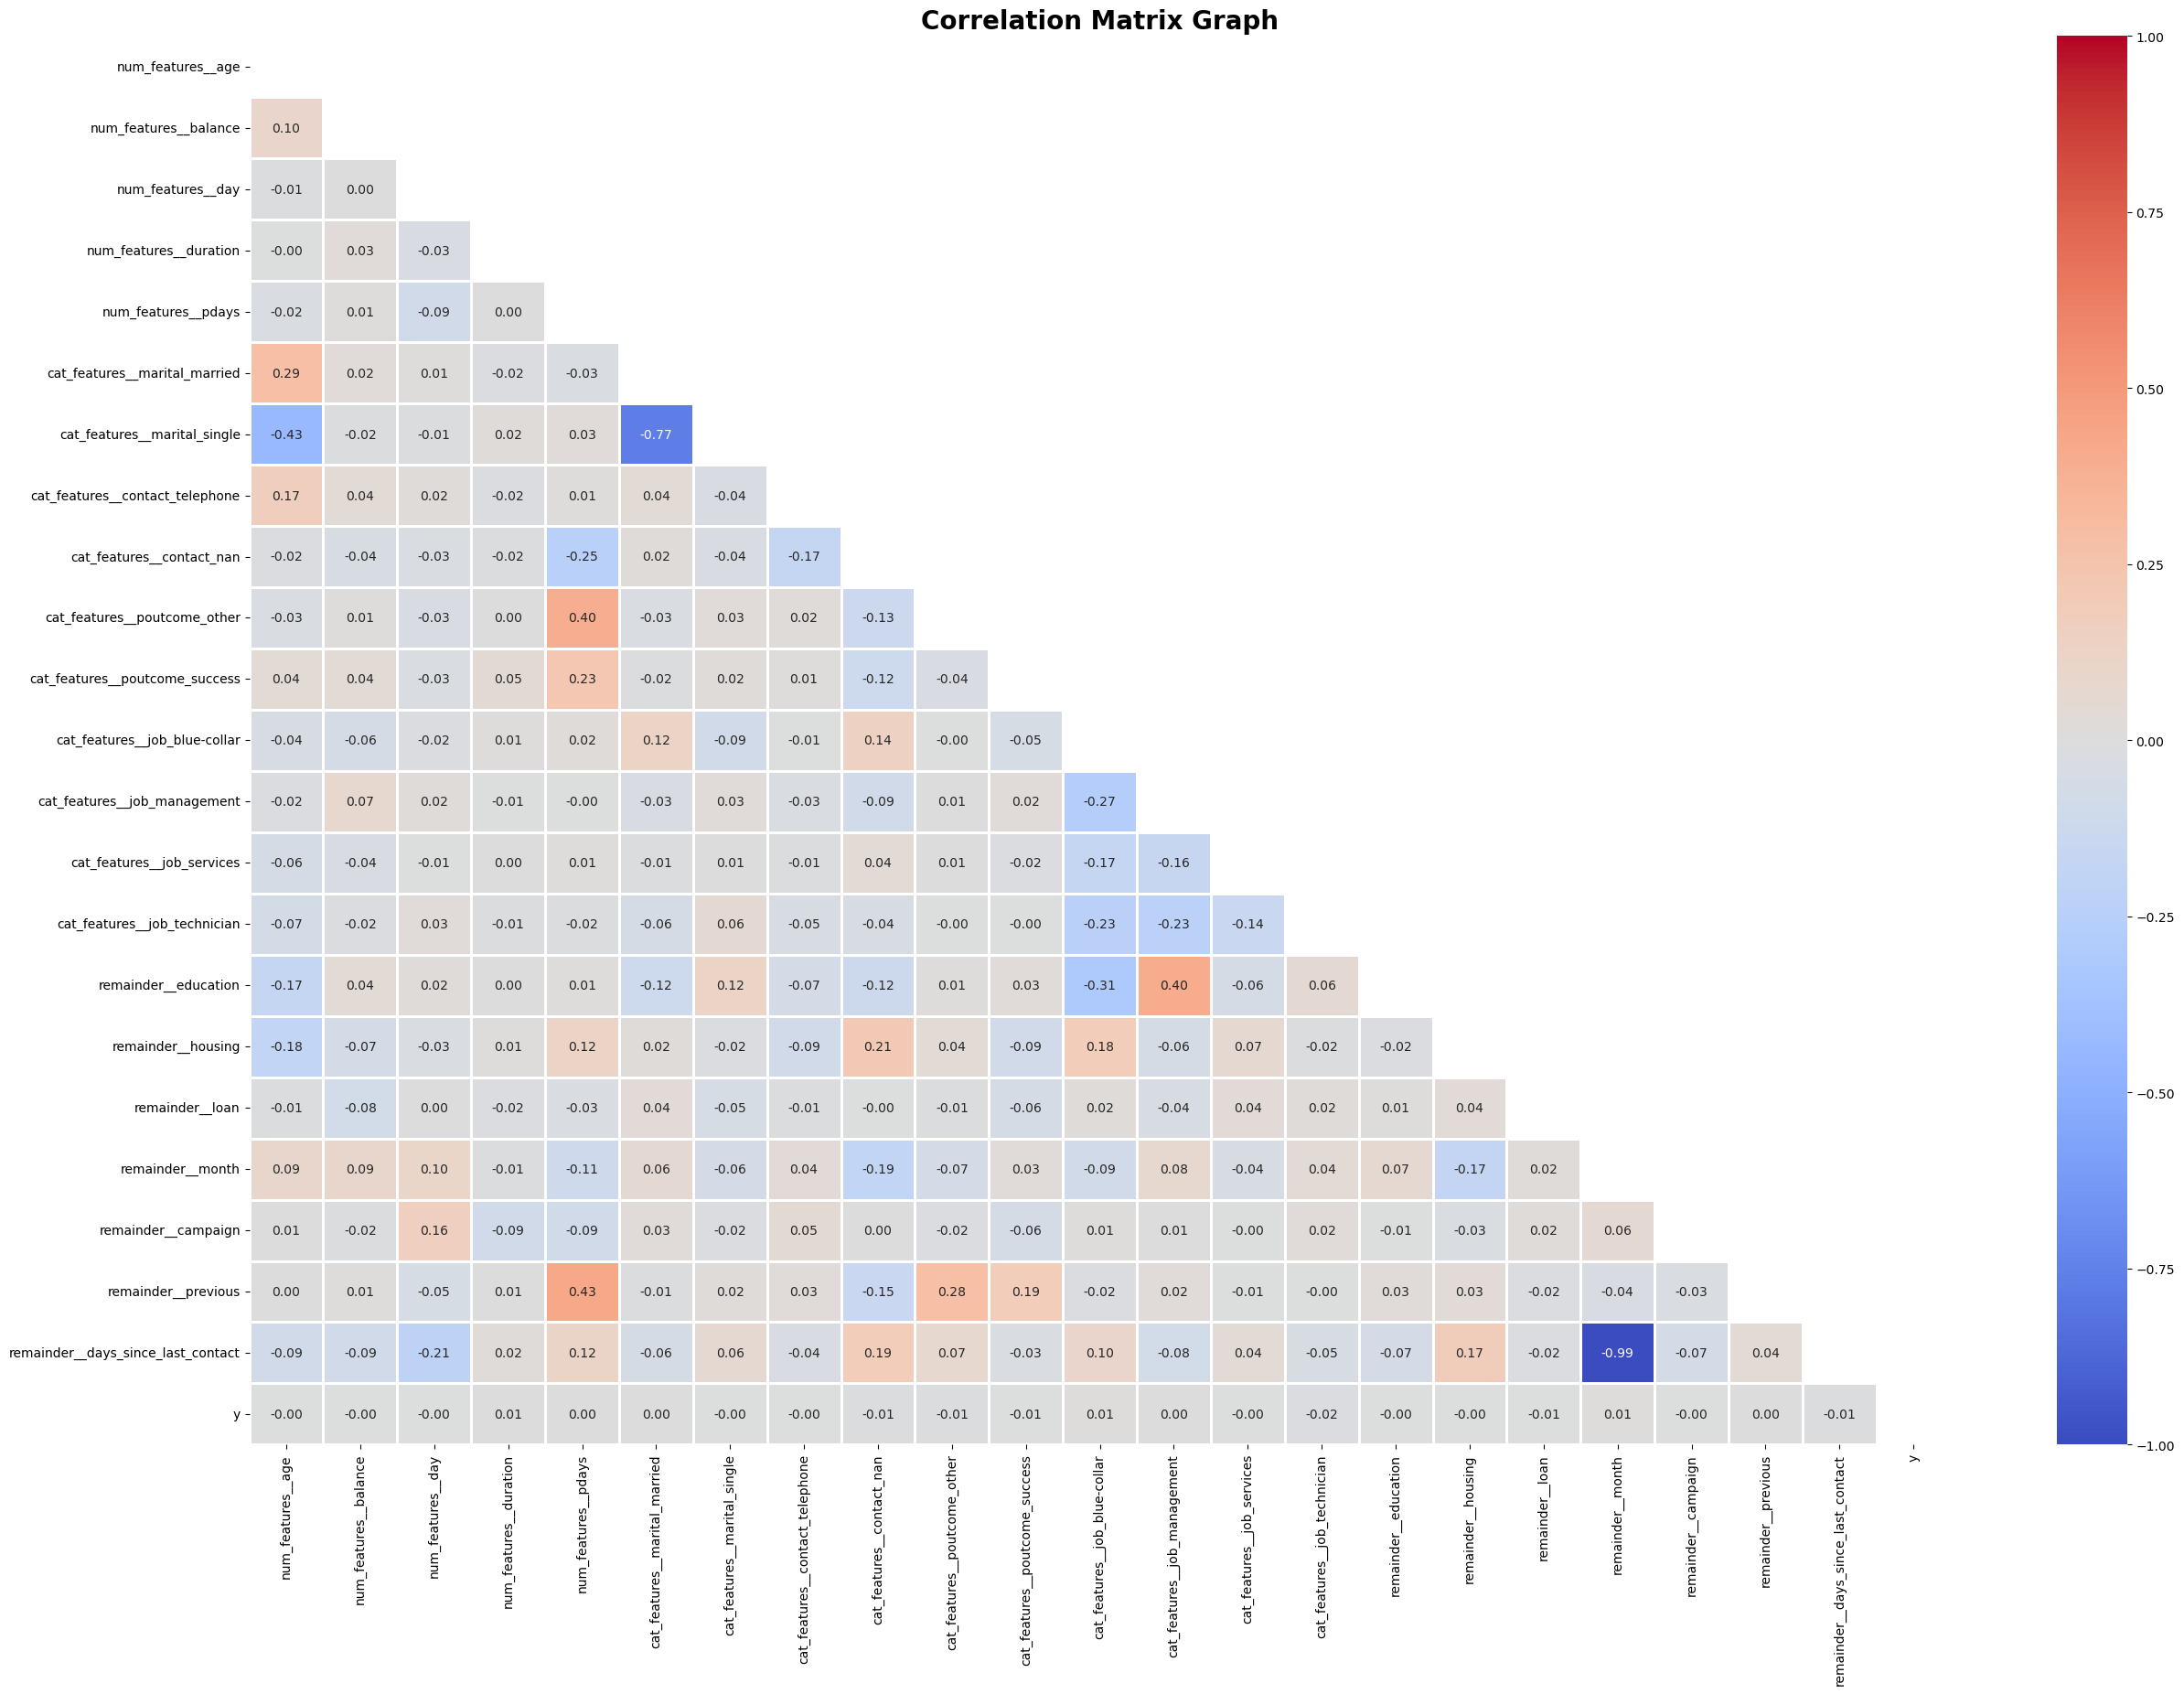

In [93]:
corr_pipe = Pipeline(steps=[
    ('remove_placeholder', remove_placeholder()),
    ('bin_transform', bin_transform()),
    ('ord_transform', ord_transform()),  
    ('feature_engineering', create_features()),
    ('preprocessor', preprocessor),
    ('imputer', impute_transform()),
    ('kbest', feature_selectkbest(k=30)),
    ('RFE', feature_elimination()),
    ('feature_importance', feature_importance(threshold=0.005)),
])
with capture_output(): corr_df = corr_pipe.transform(X_train)
corr_df['y'] = y_train
mask = np.triu(np.ones(corr_df.shape[1], dtype='bool'))
plt.figure(figsize=(30,20))
plt.title(label='Correlation Matrix Graph', fontdict= {'fontsize': 20, 'fontweight': 'bold'})
sns.heatmap(corr_df.corr(), vmin=-1, vmax=1, cmap='coolwarm', linewidths=2, annot=True, fmt='.2f', mask=mask)
plt.show()

- We can see that there is potential multicolinerity issue present in above graph for 'days_since_last_contact' and 'month'.  
- Tried removing both features one by one but it impacted F1-Score so didn't drop either of them

In [20]:
# Defination of function to get the model's metrics:
from IPython.display import display, HTML
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True, digits=4)
    class_report_df = pd.DataFrame(class_report).T
    class_report_df.loc['accuracy'] = [None,None, class_report['accuracy'], class_report['macro avg']['support']]
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    display(HTML(f"<br><b><span style='color: metal; padding-left: 75px;'> Accuracy: </span> <span style='margin-left: 96px;'>{accuracy}</b>"))
    display(HTML(f"<b><span style='color: metal; margin-left: 75px;'> F1-score: </span> <span style='margin-left: 100px;'>{f1}</b><br><br>"))
    display(HTML(f"<b><span style='color: metal; margin-left: 75px;'> Classification Report: </span> {class_report_df.fillna('').to_html().replace('<table', '<table style="display:inline; padding-left: 20px;"')}<br><br>"))
    display(HTML(f"<b><span style='color: metal; margin-left: 75px;'> Confusion Matrix: </span> {pd.DataFrame(conf_matrix_df).to_html().replace('<table', '<table style="display:inline; padding-left: 40px;"')}<br><br>"))
    # return accuracy, f1, class_report, conf_matrix

<h3 style="text-align: left; color:#4682B4">
    Task 24: Train a linear regression model for regression task or a logistic regression model for classification task.
</h3>

- Pipeline creation with Logistic Regression model

In [91]:
pipe = Pipeline(steps=[
    ('remove_placeholder', remove_placeholder()),
    ('bin_transform', bin_transform()),
    ('ord_transform', ord_transform()),  
    ('feature_engineering', create_features()),
    ('preprocessor', preprocessor),
    ('imputer', impute_transform()),
    ('kbest', feature_selectkbest(k=30)),
    ('RFE', feature_elimination()),
    ('feature_importance', feature_importance(threshold=0.005)),
    # ('VIF', cal_drop_high_vif()),
    # ('PCA', PCA(n_components='mle')),
    ('Logistic Regression', LogisticRegression(max_iter=1000))
])

pipe.fit(X_train_sampled, y_train_sampled)


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 7088
	Binary Transform:		 Total Features: 16	 Total Samples: 7088
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 7088
	Feature Engineering:		 Total Features: 17	 Total Samples: 7088
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 7088
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 7088
	Imputed Dataset:		 Total Features: 31	 Total Samples: 7088
	After SelectKBest:		 Total Features: 30	 Total Samples: 7088
	After RFE:			 Total Features: 24	 Total Samples: 7088
	After Feature Importance:	 Total Features: 19	 Total Samples: 7088

---------------------------------------------------------------------------------------------



Pipeline(steps=[('remove_placeholder', remove_placeholder()),
                ('bin_transform', bin_transform()),
                ('ord_transform', ord_transform()),
                ('feature_engineering', create_features()),
                ('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num_features',
                                                  Pipeline(steps=[('scaler',
                                                                   num_transform())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays']),
                                                 ('cat_features',
                                                  Pipeline(steps=[('encoder',
                                                                   cat_transform())]),
                                                  ['marital', 'contact',
                                                   'poutcome', 'job'])])),
                ('imputer', impute_transform()),
                ('kbest', feature_selectkbest(k=30)),
                ('RFE', feature_elimination()),
                ('feature_importance', feature_importance(threshold=0.005)),
                ('Logistic Regression', LogisticRegression(max_iter=1000))])

<h3 style="text-align: left; color:#4682B4">
    Task 25: Evaluate the model performance using appropriate metrics (e.g., RMSE for regression, accuracy/F1-score for classification).
</h3>

In [92]:
# y_pred_lr = pipe.predict(X_test)
# print(f'Accuracy score: \t\t{accuracy}')
# print(f'F1-score: \t\t\t{f1}')
# print(f'\nClassification Report:\n{classification_report(y_test, y_pred_lr)}')
# print(f'\nConfusion Matrix:\n{pd.DataFrame(conf_matrix, index=['Class 0', 'Class 1'], columns=['Pred 0', 'Pred 1'])}')
# pd.DataFrame(confusion_matrix(y_test, y_pred_lr), index=['Class 0', 'Class 1'], columns=['Pred 0', 'Pred 1'])
get_metrics(pipe, X_test, y_test)


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 14920
	Binary Transform:		 Total Features: 16	 Total Samples: 14920
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 14920
	Feature Engineering:		 Total Features: 17	 Total Samples: 14920
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 14920
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 14920
	Imputed Dataset:		 Total Features: 31	 Total Samples: 14920
	After SelectKBest:		 Total Features: 30	 Total Samples: 14920
	After RFE:			 Total Features: 24	 Total Samples: 14920
	After Feature Importance:	 Total Features: 19	 Total Samples: 14920

---------------------------------------------------------------------------------------------



,precision,recall,f1-score,support
0,0.967739,0.837875,0.898137,13175.0
1,0.391973,0.789112,0.523773,1745.0
accuracy,,,0.832172,14920.0
macro avg,0.679856,0.813493,0.710955,14920.0
weighted avg,0.900399,0.832172,0.854352,14920.0


,Predicted 0,Predicted 1
Actual 0,11039,2136
Actual 1,368,1377


<br>
<h3 style="text-align: left; color:#4682B4">
    Task 26: Experiment with at least two other algorithms (e.g., decision tree, random forest, k-nearest neighbors) and compare their performance.
</h3>

- Comprehensive set of models are added in dictionary type variable to be tested.
- Applied Cross-Validation technique to get unbiased model performance.
- Reused pipeline object without estimator to get transformed data.
- Each and every model's metrics are stored in model_comparison_df to compare the models performance later.

In [94]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'DecisionTree Classifier': DecisionTreeClassifier(class_weight='balanced'),
    'RandomForest Classifier': RandomForestClassifier(class_weight='balanced'),
    # 'KNeighbors Classifier': KNeighborsClassifier(weights='distance'),
    'Linear SVC': LinearSVC(class_weight='balanced'),
    # 'Naive Bayes': GaussianNB(priors=(0.6, 0.4)),
    'Bagging Classifier': BaggingClassifier(),
    # 'AdaBoost Classifier': AdaBoostClassifier(),
    # 'GradientBoosting Classifier': GradientBoostingClassifier(),
    'XGB Classifier': XGBClassifier(scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()),
    'LightGBM': lgb.LGBMClassifier(class_weight='balanced'),
    'CatBoost Classifier': CatBoostClassifier(auto_class_weights='SqrtBalanced')
}

cv = {
    'kfold' : KFold(n_splits=3, shuffle=True, random_state=42), 
    'skfold' : StratifiedKFold(n_splits= 3, shuffle=True, random_state=42),
}

reuse_pipe = Pipeline(steps=[
    ('remove_placeholder', remove_placeholder()),
    ('bin_transform', bin_transform()),
    ('ord_transform', ord_transform()),  
    ('feature_engineering', create_features()),
    ('preprocessor', preprocessor),
    ('imputer', impute_transform()),
    ('kbest', feature_selectkbest(k=30)),
    ('RFE', feature_elimination()),
    ('feature_importance', feature_importance(threshold=0.005)),
    # ('VIF', cal_drop_high_vif()),
    # ('PCA', PCA(n_components='mle')),
])

model_comparison = {}    # Used to store the results of each model
score={}
for model_name, estimator in models.items():
    model_comparison[model_name] = {}
    for cv_name, strategy in cv.items():
        pipe = Pipeline(steps=[
            ('preprocessed pipe', reuse_pipe),
            (model_name, estimator)
        ])
        cv_results = cross_validate(estimator=pipe, X=X_train, y=y_train, scoring='f1', cv=strategy, n_jobs=-1, return_train_score=True)
        model_comparison[model_name][f'{cv_name}_fit_time'] = cv_results['fit_time']
        model_comparison[model_name][f'{cv_name}_score_time'] = cv_results['score_time']
        model_comparison[model_name][f'{cv_name}_test_score'] = cv_results['test_score']
        model_comparison[model_name][f'{cv_name}_train_score'] = cv_results['train_score']
        print(f'Model {model_name} fitted with {cv_name} strategy...!')

# Create DataFrame from the collected scores
model_comparison_df = pd.DataFrame.from_dict(model_comparison, orient='index')

# Calculate averages and add them to the DataFrame
for metric in ['fit_time', 'score_time', 'test_score', 'train_score']:
    for cv_name in cv.keys():
        model_comparison_df[f'{cv_name}_{metric}_avg'] = model_comparison_df.apply(lambda row: np.mean(row[f'{cv_name}_{metric}']), axis=1)

# Reorder the columns to group averages with their respective metrics
ordered_columns = []
for metric in ['fit_time', 'score_time', 'test_score', 'train_score']:
    for cv_name in cv.keys():
        ordered_columns.append(f'{cv_name}_{metric}')
        ordered_columns.append(f'{cv_name}_{metric}_avg')

Model Logistic Regression fitted with kfold strategy...!
Model Logistic Regression fitted with skfold strategy...!
Model DecisionTree Classifier fitted with kfold strategy...!
Model DecisionTree Classifier fitted with skfold strategy...!
Model RandomForest Classifier fitted with kfold strategy...!
Model RandomForest Classifier fitted with skfold strategy...!
Model Linear SVC fitted with kfold strategy...!
Model Linear SVC fitted with skfold strategy...!
Model Bagging Classifier fitted with kfold strategy...!
Model Bagging Classifier fitted with skfold strategy...!
Model XGB Classifier fitted with kfold strategy...!
Model XGB Classifier fitted with skfold strategy...!
Model LightGBM fitted with kfold strategy...!
Model LightGBM fitted with skfold strategy...!
Model CatBoost Classifier fitted with kfold strategy...!
Model CatBoost Classifier fitted with skfold strategy...!


In [34]:
model_comparison_df

,kfold_fit_time,kfold_score_time,kfold_test_score,kfold_train_score,skfold_fit_time,skfold_score_time,skfold_test_score,skfold_train_score,kfold_fit_time_avg,skfold_fit_time_avg,kfold_score_time_avg,skfold_score_time_avg,kfold_test_score_avg,skfold_test_score_avg,kfold_train_score_avg,skfold_train_score_avg
Logistic Regression,"[6.719511032104492, 6.7785727977752686, 6.7893...","[0.27002954483032227, 0.25133705139160156, 0.2...","[0.514013749338974, 0.5119472672342763, 0.5118...","[0.5087790935075541, 0.5193596935285265, 0.512...","[6.471148252487183, 6.384692907333374, 6.40134...","[0.2523024082183838, 0.22994041442871094, 0.24...","[0.5271530444322545, 0.4957582184517497, 0.502...","[0.5016722408026756, 0.5094590993871569, 0.514...",6.762491,6.419063,0.272095,0.241057,0.512620,0.508352,0.513519,0.508674
DecisionTree Classifier,"[6.244774341583252, 6.3434836864471436, 6.3215...","[0.29668259620666504, 0.23227548599243164, 0.2...","[0.4857635893011217, 0.42685638061360603, 0.44...","[1.0, 1.0, 1.0]","[6.3308656215667725, 6.188992500305176, 6.1738...","[0.2248082160949707, 0.22600722312927246, 0.22...","[0.4775989560678556, 0.4672735153879497, 0.458...","[1.0, 1.0, 1.0]",6.303282,6.231235,0.258243,0.224541,0.452581,0.467651,1.000000,1.000000
RandomForest Classifier,"[9.269965171813965, 9.114447355270386, 9.11287...","[0.3831214904785156, 0.4594855308532715, 0.389...","[0.4370786516853933, 0.42494226327944573, 0.47...","[1.0, 1.0, 1.0]","[9.45434308052063, 9.53637170791626, 9.3776528...","[0.4111788272857666, 0.39449000358581543, 0.39...","[0.44011461318051576, 0.4440639269406393, 0.44...","[1.0, 0.9997883597883598, 0.9995764506565015]",9.165761,9.456123,0.410572,0.400796,0.444180,0.442118,1.000000,0.999788
Linear SVC,"[6.045433521270752, 6.123852729797363, 6.17419...","[0.2686629295349121, 0.22782373428344727, 0.22...","[0.5284169670085944, 0.5198969367306041, 0.522...","[0.5227011494252873, 0.5280022685382106, 0.521...","[6.135430335998535, 5.994308948516846, 6.06026...","[0.220367431640625, 0.29213929176330566, 0.221...","[0.5315238903025162, 0.5141226818830242, 0.515...","[0.5134610047182903, 0.5288780066253781, 0.528...",6.114493,6.063335,0.241731,0.244624,0.523577,0.520452,0.524143,0.523682
Bagging Classifier,"[7.573378801345825, 7.6170501708984375, 7.7628...","[0.25850963592529297, 0.27433133125305176, 0.2...","[0.49383932971907346, 0.4909274193548387, 0.50...","[0.9699890470974808, 0.9622847176804011, 0.965...","[7.51282525062561, 7.414960861206055, 7.233655...","[0.2533729076385498, 0.31423497200012207, 0.25...","[0.5042351768809168, 0.4747120681021532, 0.497...","[0.9660278745644599, 0.9698416142330224, 0.967...",7.651099,7.387147,0.259710,0.274721,0.496537,0.492002,0.965787,0.967833
XGB Classifier,"[6.6922523975372314, 6.805521726608276, 6.6714...","[0.3044881820678711, 0.33453822135925293, 0.26...","[0.6099726775956285, 0.5947033188065706, 0.599...","[0.816792552257158, 0.812553888601483, 0.80867...","[6.5013747215271, 6.415984153747559, 6.4670109...","[0.2753479480743408, 0.28050827980041504, 0.28...","[0.6110731373889269, 0.6079891672308734, 0.587...","[0.8109513082654652, 0.8236529041287614, 0.817...",6.723060,6.461457,0.301478,0.279713,0.601490,0.602021,0.812675,0.817216
LightGBM,"[6.092822790145874, 6.054926156997681, 5.94600...","[0.31275153160095215, 0.3565816879272461, 0.31...","[0.6079009433962265, 0.5923770730288042, 0.599...","[0.6718146718146718, 0.6719693622035646, 0.670...","[6.599095582962036, 6.420267820358276, 6.45237...","[0.34210205078125, 0.37708020210266113, 0.3973...","[0.6126823459362906, 0.603071470761961, 0.5936...","[0.6693121693121693, 0.6718520692691518, 0.678...",6.031252,6.490580,0.328897,0.372182,0.599954,0.603122,0.671570,0.673360
CatBoost Classifier,"[22.011318922042847, 22.25994086265564, 22.058...","[0.31018519401550293, 0.2556641101837158, 0.27...","[0.6328066215199398, 0.6207674943566591, 0.634...","[0.7877041306436119, 0.7905749293119698, 0.781...","[22.254801034927368, 22.452091

<h3 style="text-align: left; color:#4682B4">
    Task 27: Select top 2 or 3 models (considering preferable metric) for further tuneup their hyperparameters.
</h3>

In [35]:
# Take top 3 models by their average test accuracy score.
model_comparison_df.sort_values(by='skfold_test_score_avg', ascending=False).head(3)

,kfold_fit_time,kfold_score_time,kfold_test_score,kfold_train_score,skfold_fit_time,skfold_score_time,skfold_test_score,skfold_train_score,kfold_fit_time_avg,skfold_fit_time_avg,kfold_score_time_avg,skfold_score_time_avg,kfold_test_score_avg,skfold_test_score_avg,kfold_train_score_avg,skfold_train_score_avg
CatBoost Classifier,"[22.011318922042847, 22.25994086265564, 22.058...","[0.31018519401550293, 0.2556641101837158, 0.27...","[0.6328066215199398, 0.6207674943566591, 0.634...","[0.7877041306436119, 0.7905749293119698, 0.781...","[22.254801034927368, 22.452091932296753, 22.14...","[0.28284764289855957, 0.25674009323120117, 0.3...","[0.6443104747550866, 0.6274509803921569, 0.614...","[0.7835169008735283, 0.7818836460109911, 0.786...",22.109957,22.282811,0.278901,0.281184,0.629498,0.628601,0.786504,0.784101
LightGBM,"[6.092822790145874, 6.054926156997681, 5.94600...","[0.31275153160095215, 0.3565816879272461, 0.31...","[0.6079009433962265, 0.5923770730288042, 0.599...","[0.6718146718146718, 0.6719693622035646, 0.670...","[6.599095582962036, 6.420267820358276, 6.45237...","[0.34210205078125, 0.37708020210266113, 0.3973...","[0.6126823459362906, 0.603071470761961, 0.5936...","[0.6693121693121693, 0.6718520692691518, 0.678...",6.031252,6.490580,0.328897,0.372182,0.599954,0.603122,0.671570,0.673360
XGB Classifier,"[6.6922523975372314, 6.805521726608276, 6.6714...","[0.3044881820678711, 0.33453822135925293, 0.26...","[0.6099726775956285, 0.5947033188065706, 0.599...","[0.816792552257158, 0.812553888601483, 0.80867...","[6.5013747215271, 6.415984153747559, 6.4670109...","[0.2753479480743408, 0.28050827980041504, 0.28...","[0.6110731373889269, 0.6079891672308734, 0.587...","[0.8109513082654652, 0.8236529041287614, 0.817...",6.723060,6.461457,0.301478,0.279713,0.601490,0.602021,0.812675,0.817216


In [36]:
# Get the top 3 models by comparing all models' test avg scores for kfold and skfold strategy:
best_model = model_comparison_df[['kfold_test_score_avg','skfold_test_score_avg']].reset_index(names='Model')
best_model['Best_Score'] = best_model[['kfold_test_score_avg','skfold_test_score_avg']].max(axis=1)
best_model['Strategy'] = best_model[['kfold_test_score_avg','skfold_test_score_avg']].idxmax(axis=1)

best_model[['Model', 'Best_Score', 'Strategy']].sort_values(by='Best_Score', ascending=False).head(3)

,Model,Best_Score,Strategy
7,CatBoost Classifier,0.629498,kfold_test_score_avg
6,LightGBM,0.603122,skfold_test_score_avg
5,XGB Classifier,0.602021,skfold_test_score_avg


<h1 style="text-align: left; color:#32CD32">7. Model Tuning</h1>

<h3 style="text-align: left; color:#4682B4">
    Task 28: Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV.
</h3>

- Observed that XGB Classifier and LightGBM scores are so close or even sometimes changing their position.
- Hyperparameter tunning for XGB Classifier Model:

In [37]:
# Created a df to store the results of top 3 models to compare:
top3_models_score = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

def get_short_metrics(model, X_test, y_test, prob=0.5):
    with capture_output():
        if prob == 0.5:
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            return [accuracy, f1, precision, recall]
        else:
            prob_y_pred = model.predict_proba(X_test)[:, 1]
            y_pred = (prob_y_pred >= prob).astype(int)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            return [accuracy, f1, precision, recall]


In [38]:
# First tried with below comprehensive param grid:
# param_grid = {
#     'XGB Classifier__n_estimators': [50, 100, 200, 500],
#     'XGB Classifier__learning_rate': [0.01, 0.1, 0.2, 0.5],
#     'XGB Classifier__max_depth': [1, 3, 5, 7, 10, None],
#     'XGB Classifier__subsample': [0.25, 0.5, 0.75, 1],
#     'XGB Classifier__colsample_bytree': [0.4, 0.7, 1],
#     'XGB Classifier__min_child_weight': [1, 5, 10],
#     'XGB Classifier__gamma': [0.1, 0.2, 0.5],
#     'XGB Classifier__importance_type': ['gain', 'weight', 'cover', 'total_gain', 'total_cover'],
#     'XGB Classifier__booster': ['gbtree', 'gblinear', 'dart'],
# }

# Later selected param grid parameters which are near to optimal params: (Below grid is re-defined in case mistakeny ran above grid will take hours)

param_grid = {
    'XGB Classifier__n_estimators': [50, 100, 200],
    'XGB Classifier__learning_rate': [0.1, 0.2],
    'XGB Classifier__max_depth': [5, 10],
    'XGB Classifier__subsample': [0.75, 1],
    'XGB Classifier__colsample_bytree': [0.7, 1],
    'XGB Classifier__min_child_weight': [1, 2, 5],
    'XGB Classifier__gamma': [0.1, 0.5],
    'XGB Classifier__importance_type': ['gain', 'weight'],
    'XGB Classifier__scale_pos_weight' : [(y_train == 0).sum() / (y_train == 1).sum()],
    # 'XGB Classifier__booster': ['gbtree', 'gblinear', 'dart'], # Can be re-added if necessary
}

rs_cv_xgb_pipe = Pipeline(steps=[
    ('preprocessed pipe', reuse_pipe),
    ('XGB Classifier', XGBClassifier(scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum())),
])

rs_cv_xgb = RandomizedSearchCV(estimator=rs_cv_xgb_pipe, param_distributions=param_grid, n_jobs=-1, scoring='f1', cv=list(cv.values())[1], verbose=1)
rs_cv_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 30291
	Binary Transform:		 Total Features: 16	 Total Samples: 30291
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 30291
	Feature Engineering:		 Total Features: 17	 Total Samples: 30291
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 30291
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 30291
	Imputed Dataset:		 Total Features: 31	 Total Samples: 30291
	After SelectKBest:		 Total Features: 30	 Total Samples: 30291
	After RFE:			 Total Features: 24	 Total Samples: 30291
	After Feature Importance:	 Total Features: 22	 Total Samples: 30291

---------------------------------------------------------------------------------------------



RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessed pipe',
                                              Pipeline(steps=[('remove_placeholder',
                                                               remove_placeholder()),
                                                              ('bin_transform',
                                                               bin_transform()),
                                                              ('ord_transform',
                                                               ord_transform()),
                                                              ('feature_engineering',
                                                               create_features()),
                                                              ('preprocessor',
                                                               ColumnTransformer(force_int_remainder_c...
                                        'XGB Classifier__gamma': [0.1, 0.5],
                                        'XGB Classifier__importance_type': ['gain',
                                                                            'weight'],
                                        'XGB Classifier__learning_rate': [0.1,
                                                                          0.2],
                                        'XGB Classifier__max_depth': [5, 10],
                                        'XGB Classifier__min_child_weight': [1,
                                                                             2,
                                                                             5],
                                        'XGB Classifier__n_estimators': [50,
                                                                         100,
                                                                         200],
                                        'XGB Classifier__scale_pos_weight': [7.547121896162528],
                                        'XGB Classifier__subsample': [0.75, 1]},
                   scoring='f1', verbose=1)

In [39]:
xgb_best_params = rs_cv_xgb.best_params_
rs_cv_xgb.best_score_, rs_cv_xgb.best_params_

(0.6193789316627261,
 {'XGB Classifier__subsample': 1,
  'XGB Classifier__scale_pos_weight': 7.547121896162528,
  'XGB Classifier__n_estimators': 50,
  'XGB Classifier__min_child_weight': 5,
  'XGB Classifier__max_depth': 10,
  'XGB Classifier__learning_rate': 0.2,
  'XGB Classifier__importance_type': 'weight',
  'XGB Classifier__gamma': 0.1,
  'XGB Classifier__colsample_bytree': 0.7})

In [160]:
# Result of comprehensive param grid: - Stored result for comparision as we are using Randomized search CV:

# (0.5379663213734905, {'subsample': 0.75, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.2, 'importance_type': 'weight', 'gamma': 0.1, 'colsample_bytree': 1, class_weight' : 'balanced'})
# (0.5401256105052310, {'subsample': 0.75,'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'importance_type': 'total_cover', 'gamma': 0.1, 'colsample_bytree': 0.7, class_weight' : 'balanced'})
# (0.5390365422158956, {'subsample': 1, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.1, 'importance_type': 'gain', 'gamma': 0.05, 'colsample_bytree': 1, class_weight' : 'balanced'})
# (0.5386942513264852, {'subsample': 1, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5,'learning_rate': 0.2,'importance_type': 'gain', 'gamma': 0.1, 'colsample_bytree': 1, class_weight' : 'balanced'})
# (0.5496730521910737, {'subsample': 0.75, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.2, 'importance_type': 'gain', 'gamma': 0.1, 'colsample_bytree': 1, class_weight' : 'balanced'})
# (0.608514625396451, {'subsample': 1, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'importance_type': 'gain', 'gamma': 0.5, 'colsample_bytree': 0.7, 'booster': 'dart', 'scale_pos_weight': 7.547121896162528})
# (0.616976209659978, {'subsample': 0.75, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'importance_type': 'gain', 'gamma': 0.5, 'colsample_bytree': 1, 'scale_pos_weight': 7.547121896162528})

In [40]:
# Result of refined param grid: - Result of Randomized search CV multiple times to get optimal best_params_:

# For KFold: list(cv.values())[0]
# (0.5378393598989449, {'subsample': 1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.2, 'importance_type': 'weight', 'gamma': 0.5, 'colsample_bytree': 1})
# (0.5447099703786042, {'subsample': 0.75, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'importance_type': 'gain', 'gamma': 0.1, 'colsample_bytree': 1})
# (0.5351919472628403, {'subsample': 0.75, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.1, 'importance_type': 'weight', 'gamma': 0.5, 'colsample_bytree': 0.7})

# For SKFold: list(cv.values())[1]
# (0.5460645805004346, {'subsample': 0.75, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.2, 'importance_type': 'weight', 'gamma': 0.1, 'colsample_bytree': 1})
# (0.549952901168325, {'subsample': 0.75, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.1, 'importance_type': 'gain', 'gamma': 0.5, 'colsample_bytree': 1})
# (0.5479447308363384, {'subsample': 0.75, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'importance_type': 'weight', 'gamma': 0.5, 'colsample_bytree': 1})


# Stored top scored best_params_ into best_params for later use.
#########################################################################################################################################################
xgb_best_params = {'subsample': 0.75, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'importance_type': 'gain', 'gamma': 0.5, 'colsample_bytree': 1, 'scale_pos_weight': 7.547121896162528}
#########################################################################################################################################################

In [41]:
# Evaluate the recently tuned model on test set to get its actual performance.

# y_pred_rs_cv_xgb_best_est = rs_cv_xgb.best_estimator_.predict(X_test)
# print(f'Accuracy score: \t\t{accuracy_score(y_test, y_pred_rs_cv_xgb_best_est)}')
# print(f'F1-score: \t\t\t{f1_score(y_test, y_pred_rs_cv_xgb_best_est)}')
# print(f'\nClassification Report: \n{classification_report(y_test, y_pred_rs_cv_xgb_best_est)}')
get_metrics(model=rs_cv_xgb.best_estimator_, X_test=X_test, y_test=y_test)
metric = get_short_metrics(rs_cv_xgb.best_estimator_, X_test, y_test)
top3_models_score.loc[len(top3_models_score)] = ['rs_cv_xgb.best_estimator_'] + metric
top3_models_score.tail()


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 14920
	Binary Transform:		 Total Features: 16	 Total Samples: 14920
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 14920
	Feature Engineering:		 Total Features: 17	 Total Samples: 14920
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 14920
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 14920
	Imputed Dataset:		 Total Features: 31	 Total Samples: 14920
	After SelectKBest:		 Total Features: 30	 Total Samples: 14920
	After RFE:			 Total Features: 24	 Total Samples: 14920
	After Feature Importance:	 Total Features: 22	 Total Samples: 14920

---------------------------------------------------------------------------------------------



,precision,recall,f1-score,support
0,0.970053,0.902315,0.934959,13175.0
1,0.517073,0.789685,0.624943,1745.0
accuracy,,,0.889142,14920.0
macro avg,0.743563,0.846,0.779951,14920.0
weighted avg,0.917074,0.889142,0.898700,14920.0


,Predicted 0,Predicted 1
Actual 0,11888,1287
Actual 1,367,1378


,Model Name,Accuracy,F1-Score,Precision,Recall
0,rs_cv_xgb.best_estimator_,0.889142,0.624943,0.517073,0.789685


In [42]:
rs_cv_xgb_best_est_calb = CalibratedClassifierCV(estimator=rs_cv_xgb.best_estimator_, method='sigmoid', cv=5, n_jobs=-1)
rs_cv_xgb_best_est_calb.fit(X_train, y_train)

# y_pred_rs_cv_xgb_best_est_calb = rs_cv_xgb_best_est_calb.predict(X_test)
# print(f'Accuracy score: \t\t{accuracy_score(y_test, y_pred_rs_cv_xgb_best_est_calb)}')
# print(f'F1-score: \t\t\t{f1_score(y_test, y_pred_rs_cv_xgb_best_est_calb)}')
# print(f'\nClassification Report: \n{classification_report(y_test, y_pred_rs_cv_xgb_best_est_calb)}')
get_metrics(rs_cv_xgb_best_est_calb, X_test, y_test)
metric = get_short_metrics(rs_cv_xgb_best_est_calb, X_test, y_test)
top3_models_score.loc[len(top3_models_score)] = ['rs_cv_xgb_best_est_calb'] + metric
top3_models_score.tail()


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 14920
	Binary Transform:		 Total Features: 16	 Total Samples: 14920
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 14920
	Feature Engineering:		 Total Features: 17	 Total Samples: 14920
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 14920
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 14920
	Imputed Dataset:		 Total Features: 31	 Total Samples: 14920
	After SelectKBest:		 Total Features: 30	 Total Samples: 14920
	After RFE:			 Total Features: 24	 Total Samples: 14920
	After Feature Importance:	 Total Features: 21	 Total Samples: 14920

---------------------------------------------------------------------------------------------


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 T

,precision,recall,f1-score,support
0,0.939114,0.957647,0.948290,13175.0
1,0.624242,0.531232,0.573994,1745.0
accuracy,,,0.907775,14920.0
macro avg,0.781678,0.74444,0.761142,14920.0
weighted avg,0.902288,0.907775,0.904514,14920.0


,Predicted 0,Predicted 1
Actual 0,12617,558
Actual 1,818,927


,Model Name,Accuracy,F1-Score,Precision,Recall
0,rs_cv_xgb.best_estimator_,0.889142,0.624943,0.517073,0.789685
1,rs_cv_xgb_best_est_calb,0.907775,0.573994,0.624242,0.531232


In [43]:
best_xgb_pipe = Pipeline(steps=[
    ('preprocessed pipe', reuse_pipe),
    ('XGB Classifier', XGBClassifier(**xgb_best_params)),
])
best_xgb_pipe.fit(X_train, y_train)

# y_pred_best_xgb = best_xgb_pipe.predict(X_test)
# print(f'Accuracy score: \t\t{accuracy_score(y_test, y_pred_best_xgb)}')
# print(f'F1-score: \t\t\t{f1_score(y_test, y_pred_best_xgb)}')
# print(f'\nClassification Report: \n{classification_report(y_test, y_pred_best_xgb)}')
get_metrics(best_xgb_pipe, X_test, y_test)
metric = get_short_metrics(best_xgb_pipe, X_test, y_test)
top3_models_score.loc[len(top3_models_score)] = ['best_xgb_pipe'] + metric
top3_models_score.tail()


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 30291
	Binary Transform:		 Total Features: 16	 Total Samples: 30291
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 30291
	Feature Engineering:		 Total Features: 17	 Total Samples: 30291
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 30291
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 30291
	Imputed Dataset:		 Total Features: 31	 Total Samples: 30291
	After SelectKBest:		 Total Features: 30	 Total Samples: 30291
	After RFE:			 Total Features: 24	 Total Samples: 30291
	After Feature Importance:	 Total Features: 22	 Total Samples: 30291

---------------------------------------------------------------------------------------------


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 T

,precision,recall,f1-score,support
0,0.962519,0.914156,0.937714,13175.0
1,0.53012,0.731232,0.614644,1745.0
accuracy,,,0.892761,14920.0
macro avg,0.74632,0.822694,0.776179,14920.0
weighted avg,0.911947,0.892761,0.899929,14920.0


,Predicted 0,Predicted 1
Actual 0,12044,1131
Actual 1,469,1276


,Model Name,Accuracy,F1-Score,Precision,Recall
0,rs_cv_xgb.best_estimator_,0.889142,0.624943,0.517073,0.789685
1,rs_cv_xgb_best_est_calb,0.907775,0.573994,0.624242,0.531232
2,best_xgb_pipe,0.892761,0.614644,0.530120,0.731232


In [44]:
best_xgb_calibrated = CalibratedClassifierCV(estimator=best_xgb_pipe, method='sigmoid', cv=5, n_jobs=-1)
best_xgb_calibrated.fit(X_train, y_train)

# y_pred_best_xgb_calibrated = best_xgb_calibrated.predict(X_test)
# print(f'Accuracy score: \t\t{accuracy_score(y_test, y_pred_best_xgb_calibrated)}')
# print(f'F1-score: \t\t\t{f1_score(y_test, y_pred_best_xgb_calibrated)}')
# print(f'\nClassification Report: \n{classification_report(y_test, y_pred_best_xgb_calibrated)}')
get_metrics(best_xgb_calibrated, X_test, y_test)
metric = get_short_metrics(best_xgb_calibrated, X_test, y_test)
top3_models_score.loc[len(top3_models_score)] = ['best_xgb_calibrated'] + metric
top3_models_score.tail()


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 14920
	Binary Transform:		 Total Features: 16	 Total Samples: 14920
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 14920
	Feature Engineering:		 Total Features: 17	 Total Samples: 14920
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 14920
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 14920
	Imputed Dataset:		 Total Features: 31	 Total Samples: 14920
	After SelectKBest:		 Total Features: 30	 Total Samples: 14920
	After RFE:			 Total Features: 24	 Total Samples: 14920
	After Feature Importance:	 Total Features: 21	 Total Samples: 14920

---------------------------------------------------------------------------------------------


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 T

,precision,recall,f1-score,support
0,0.937037,0.960152,0.948454,13175.0
1,0.630282,0.512894,0.565561,1745.0
accuracy,,,0.907842,14920.0
macro avg,0.783659,0.736523,0.757007,14920.0
weighted avg,0.90116,0.907842,0.903672,14920.0


,Predicted 0,Predicted 1
Actual 0,12650,525
Actual 1,850,895


,Model Name,Accuracy,F1-Score,Precision,Recall
0,rs_cv_xgb.best_estimator_,0.889142,0.624943,0.517073,0.789685
1,rs_cv_xgb_best_est_calb,0.907775,0.573994,0.624242,0.531232
2,best_xgb_pipe,0.892761,0.614644,0.530120,0.731232
3,best_xgb_calibrated,0.907842,0.565561,0.630282,0.512894


- Hyperparameter tunning for LightGBM Classifier:

In [45]:
# param_grid = {
#     'LGB Classifier__boosting_type': ['gbdt', 'dart'],
#     'LGB Classifier__num_leaves': [31, 50, 100],
#     'LGB Classifier__learning_rate': [0.01, 0.05, 0.1],
#     'LGB Classifier__n_estimators': [50, 100, 200],
#     'LGB Classifier__max_depth': [-1, 5, 10],
#     'LGB Classifier__subsample': [0.6, 0.8, 1.0],
#     'LGB Classifier__colsample_bytree': [0.6, 0.8, 1.0],
#     'LGB Classifier__min_child_samples': [10, 20, 30],
#     'LGB Classifier__reg_alpha': [0, 0.1, 0.5],
#     'LGB Classifier__reg_lambda': [0, 0.1, 0.5],
#     'LGB Classifier__class_weight': ['balanced'],
# }
param_grid = {
    'LGB Classifier__num_leaves': [50, 100],
    'LGB Classifier__learning_rate': [0.05, 0.1],
    'LGB Classifier__n_estimators': [200],
    'LGB Classifier__max_depth': [-1, 10],
    'LGB Classifier__subsample': [0.8, 1.0],
    'LGB Classifier__colsample_bytree': [0.6, 1.0],
    'LGB Classifier__min_child_samples': [10],
    'LGB Classifier__reg_alpha': [0, 0.5],
    'LGB Classifier__reg_lambda': [0, 0.5],
    'LGB Classifier__class_weight': ['balanced'],
}

cv = {
    'kfold' : KFold(n_splits=3, shuffle=True, random_state=42), 
    'skfold' : StratifiedKFold(n_splits= 3, shuffle=True, random_state=42),
}

rs_cv_lgb_pipe = Pipeline(steps=[
    ('preprocessed pipe', reuse_pipe),
    ('LGB Classifier', lgb.LGBMClassifier()),
])
rs_cv_lgb = RandomizedSearchCV(estimator=rs_cv_lgb_pipe, param_distributions=param_grid, n_jobs=-1, scoring='f1', cv=list(cv.values())[0], verbose=1)
rs_cv_lgb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 30291
	Binary Transform:		 Total Features: 16	 Total Samples: 30291
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 30291
	Feature Engineering:		 Total Features: 17	 Total Samples: 30291
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 30291
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 30291
	Imputed Dataset:		 Total Features: 31	 Total Samples: 30291
	After SelectKBest:		 Total Features: 30	 Total Samples: 30291
	After RFE:			 Total Features: 24	 Total Samples: 30291
	After Feature Importance:	 Total Features: 22	 Total Samples: 30291

---------------------------------------------------------------------------------------------

[LightGBM] [Info] Number of positive: 3544, number of negative: 26747
[LightGBM] [Info

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessed pipe',
                                              Pipeline(steps=[('remove_placeholder',
                                                               remove_placeholder()),
                                                              ('bin_transform',
                                                               bin_transform()),
                                                              ('ord_transform',
                                                               ord_transform()),
                                                              ('feature_engineering',
                                                               create_features()),
                                                              ('preprocessor',
                                                               ColumnTransformer(force_int_remainder_cols=False,...
                                        'LGB Classifier__colsample_bytree': [0.6,
                                                                             1.0],
                                        'LGB Classifier__learning_rate': [0.05,
                                                                          0.1],
                                        'LGB Classifier__max_depth': [-1, 10],
                                        'LGB Classifier__min_child_samples': [10],
                                        'LGB Classifier__n_estimators': [200],
                                        'LGB Classifier__num_leaves': [50, 100],
                                        'LGB Classifier__reg_alpha': [0, 0.5],
                                        'LGB Classifier__reg_lambda': [0, 0.5],
                                        'LGB Classifier__subsample': [0.8,
                                                                      1.0]},
                   scoring='f1', verbose=1)

In [46]:
lgb_best_params = rs_cv_lgb.best_params_
rs_cv_lgb.best_score_, rs_cv_lgb.best_params_

(0.6244472514608469,
 {'LGB Classifier__subsample': 0.8,
  'LGB Classifier__reg_lambda': 0,
  'LGB Classifier__reg_alpha': 0.5,
  'LGB Classifier__num_leaves': 100,
  'LGB Classifier__n_estimators': 200,
  'LGB Classifier__min_child_samples': 10,
  'LGB Classifier__max_depth': -1,
  'LGB Classifier__learning_rate': 0.05,
  'LGB Classifier__colsample_bytree': 0.6,
  'LGB Classifier__class_weight': 'balanced'})

In [47]:
# Below is result of above search multiple times to get optimal best_params_:

# For KFold: list(cv.values())[0]
# (0.6213243247189247, {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 100, 'n_estimators': 200, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.6, 'class_weight': 'balanced', 'boosting_type': 'gbdt'})
# (0.6160350270676637, {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 100, 'n_estimators': 100, 'min_child_samples': 10, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'class_weight': 'balanced', 'boosting_type': 'gbdt'})
# (0.6239061309041101, {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'num_leaves': 100, 'n_estimators': 200, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.6, 'class_weight': 'balanced', 'boosting_type': 'gbdt'})

# For KFold: list(cv.values())[1]
# (0.6135459519245888, {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.5, 'num_leaves': 100, 'n_estimators': 200, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'class_weight': 'balanced', 'boosting_type': 'gbdt'})
# (0.60577825535782, {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'num_leaves': 50, 'n_estimators': 200, 'min_child_samples': 30, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 1.0, 'class_weight': 'balanced', 'boosting_type': 'gbdt'})
# (0.6138977139343385, {'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha': 0.5, 'num_leaves': 100, 'n_estimators': 200, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'class_weight': 'balanced', 'boosting_type': 'dart'})

# Stored top scored best_params_ into best_params for later use. 
#########################################################################################################################################################
lgb_best_params = {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 100, 'n_estimators': 200, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.6, 'class_weight': 'balanced', 'boosting_type': 'gbdt'}
#########################################################################################################################################################

In [48]:
# Evaluate the tuned model on test set to get its actual performance.
# y_pred_rs_cv_lgb_best_est = rs_cv_lgb.best_estimator_.predict(X_test)
# print(f'Accuracy score: \t\t{accuracy_score(y_test, y_pred_rs_cv_lgb_best_est)}')
# print(f'F1-score: \t\t\t{f1_score(y_test, y_pred_rs_cv_lgb_best_est)}')
# print(f'\nClassification Report: \n{classification_report(y_test, y_pred_rs_cv_lgb_best_est)}')
# print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_rs_cv_lgb_best_est)}')
get_metrics(rs_cv_lgb.best_estimator_, X_test, y_test)
metric = get_short_metrics(rs_cv_lgb.best_estimator_, X_test, y_test)
top3_models_score.loc[len(top3_models_score)] = ['rs_cv_lgb.best_estimator_'] + metric
top3_models_score.tail()


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 14920
	Binary Transform:		 Total Features: 16	 Total Samples: 14920
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 14920
	Feature Engineering:		 Total Features: 17	 Total Samples: 14920
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 14920
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 14920
	Imputed Dataset:		 Total Features: 31	 Total Samples: 14920
	After SelectKBest:		 Total Features: 30	 Total Samples: 14920
	After RFE:			 Total Features: 24	 Total Samples: 14920
	After Feature Importance:	 Total Features: 22	 Total Samples: 14920

---------------------------------------------------------------------------------------------



,precision,recall,f1-score,support
0,0.977678,0.89093,0.932290,13175.0
1,0.506863,0.846418,0.634042,1745.0
accuracy,,,0.885724,14920.0
macro avg,0.742271,0.868674,0.783166,14920.0
weighted avg,0.922613,0.885724,0.897408,14920.0


,Predicted 0,Predicted 1
Actual 0,11738,1437
Actual 1,268,1477


,Model Name,Accuracy,F1-Score,Precision,Recall
0,rs_cv_xgb.best_estimator_,0.889142,0.624943,0.517073,0.789685
1,rs_cv_xgb_best_est_calb,0.907775,0.573994,0.624242,0.531232
2,best_xgb_pipe,0.892761,0.614644,0.530120,0.731232
3,best_xgb_calibrated,0.907842,0.565561,0.630282,0.512894
4,rs_cv_lgb.best_estimator_,0.885724,0.634042,0.506863,0.846418


In [49]:
rs_cv_lgb_best_est_calb = CalibratedClassifierCV(estimator=rs_cv_lgb.best_estimator_, method='sigmoid', cv=5, n_jobs=-1)
rs_cv_lgb_best_est_calb.fit(X_train, y_train)

# y_pred_rs_cv_lgb_best_est_calb = rs_cv_lgb_best_est_calb.predict(X_test)
# print(f'Accuracy score: \t\t{accuracy_score(y_test, y_pred_rs_cv_lgb_best_est_calb)}')
# print(f'F1-score: \t\t\t{f1_score(y_test, y_pred_rs_cv_lgb_best_est_calb)}')
# print(f'\nClassification Report: \n{classification_report(y_test, y_pred_rs_cv_lgb_best_est_calb)}')
# print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_rs_cv_lgb_best_est_calb)}')
get_metrics(rs_cv_lgb_best_est_calb, X_test, y_test)
metric = get_short_metrics(rs_cv_lgb_best_est_calb, X_test, y_test)
top3_models_score.loc[len(top3_models_score)] = ['rs_cv_lgb_best_est_calb'] + metric
top3_models_score.tail()


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 14920
	Binary Transform:		 Total Features: 16	 Total Samples: 14920
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 14920
	Feature Engineering:		 Total Features: 17	 Total Samples: 14920
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 14920
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 14920
	Imputed Dataset:		 Total Features: 31	 Total Samples: 14920
	After SelectKBest:		 Total Features: 30	 Total Samples: 14920
	After RFE:			 Total Features: 24	 Total Samples: 14920
	After Feature Importance:	 Total Features: 21	 Total Samples: 14920

---------------------------------------------------------------------------------------------


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 T

,precision,recall,f1-score,support
0,0.943856,0.954459,0.949128,13175.0
1,0.624296,0.571347,0.596649,1745.0
accuracy,,,0.909651,14920.0
macro avg,0.784076,0.762903,0.772888,14920.0
weighted avg,0.906482,0.909651,0.907903,14920.0


,Predicted 0,Predicted 1
Actual 0,12575,600
Actual 1,748,997


,Model Name,Accuracy,F1-Score,Precision,Recall
1,rs_cv_xgb_best_est_calb,0.907775,0.573994,0.624242,0.531232
2,best_xgb_pipe,0.892761,0.614644,0.530120,0.731232
3,best_xgb_calibrated,0.907842,0.565561,0.630282,0.512894
4,rs_cv_lgb.best_estimator_,0.885724,0.634042,0.506863,0.846418
5,rs_cv_lgb_best_est_calb,0.909651,0.596649,0.624296,0.571347


In [50]:
best_lgb_pipe = Pipeline(steps=[
    ('preprocessed pipe', reuse_pipe),
    ('LGB Classifier', lgb.LGBMClassifier(**lgb_best_params)),
])
best_lgb_pipe.fit(X_train, y_train)

# y_pred_best_lgb = best_lgb_pipe.predict(X_test)
# print(f'Accuracy score: \t\t{accuracy_score(y_test, y_pred_best_lgb)}')
# print(f'F1-score: \t\t\t{f1_score(y_test, y_pred_best_lgb)}')
# print(f'\nClassification Report: \n{classification_report(y_test, y_pred_best_lgb)}')
# print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_best_lgb)}')
get_metrics(best_lgb_pipe, X_test, y_test)
metric = get_short_metrics(best_lgb_pipe, X_test, y_test)
top3_models_score.loc[len(top3_models_score)] = ['best_lgb_pipe'] + metric
top3_models_score.tail()


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 30291
	Binary Transform:		 Total Features: 16	 Total Samples: 30291
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 30291
	Feature Engineering:		 Total Features: 17	 Total Samples: 30291
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 30291
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 30291
	Imputed Dataset:		 Total Features: 31	 Total Samples: 30291
	After SelectKBest:		 Total Features: 30	 Total Samples: 30291
	After RFE:			 Total Features: 24	 Total Samples: 30291
	After Feature Importance:	 Total Features: 22	 Total Samples: 30291

---------------------------------------------------------------------------------------------

[LightGBM] [Info] Number of positive: 3544, number of negative: 26747
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of tes

,precision,recall,f1-score,support
0,0.977094,0.893586,0.933476,13175.0
1,0.511668,0.841834,0.636482,1745.0
accuracy,,,0.887534,14920.0
macro avg,0.744381,0.86771,0.784979,14920.0
weighted avg,0.922659,0.887534,0.898740,14920.0


,Predicted 0,Predicted 1
Actual 0,11773,1402
Actual 1,276,1469


,Model Name,Accuracy,F1-Score,Precision,Recall
2,best_xgb_pipe,0.892761,0.614644,0.530120,0.731232
3,best_xgb_calibrated,0.907842,0.565561,0.630282,0.512894
4,rs_cv_lgb.best_estimator_,0.885724,0.634042,0.506863,0.846418
5,rs_cv_lgb_best_est_calb,0.909651,0.596649,0.624296,0.571347
6,best_lgb_pipe,0.887534,0.636482,0.511668,0.841834


In [51]:
best_lgb_calibrated = CalibratedClassifierCV(estimator=best_lgb_pipe, method='sigmoid', cv=list(cv.values())[0], n_jobs=-1)
best_lgb_calibrated.fit(X_train, y_train)

# y_pred_best_lgb_calibrated = best_lgb_calibrated.predict(X_test)
# print(f'Accuracy score: \t\t{accuracy_score(y_test, y_pred_best_lgb_calibrated)}')
# print(f'F1-score: \t\t\t{f1_score(y_test, y_pred_best_lgb_calibrated)}')
# print(f'\nClassification Report: \n{classification_report(y_test, y_pred_best_lgb_calibrated)}')
# print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_best_lgb_calibrated)}')
get_metrics(best_lgb_calibrated, X_test, y_test)
metric = get_short_metrics(best_lgb_calibrated, X_test, y_test)
top3_models_score.loc[len(top3_models_score)] = ['best_lgb_calibrated'] + metric
top3_models_score.tail()


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 14920
	Binary Transform:		 Total Features: 16	 Total Samples: 14920
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 14920
	Feature Engineering:		 Total Features: 17	 Total Samples: 14920
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 14920
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 14920
	Imputed Dataset:		 Total Features: 31	 Total Samples: 14920
	After SelectKBest:		 Total Features: 30	 Total Samples: 14920
	After RFE:			 Total Features: 24	 Total Samples: 14920
	After Feature Importance:	 Total Features: 21	 Total Samples: 14920

---------------------------------------------------------------------------------------------


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 T

,precision,recall,f1-score,support
0,0.942211,0.95537,0.948745,13175.0
1,0.623318,0.557593,0.588627,1745.0
accuracy,,,0.908847,14920.0
macro avg,0.782765,0.756482,0.768686,14920.0
weighted avg,0.904914,0.908847,0.906627,14920.0


,Predicted 0,Predicted 1
Actual 0,12587,588
Actual 1,772,973


,Model Name,Accuracy,F1-Score,Precision,Recall
3,best_xgb_calibrated,0.907842,0.565561,0.630282,0.512894
4,rs_cv_lgb.best_estimator_,0.885724,0.634042,0.506863,0.846418
5,rs_cv_lgb_best_est_calb,0.909651,0.596649,0.624296,0.571347
6,best_lgb_pipe,0.887534,0.636482,0.511668,0.841834
7,best_lgb_calibrated,0.908847,0.588627,0.623318,0.557593


In [52]:
# prob_best_lgb_calb = best_lgb_calibrated.predict_proba(X_test)[:, 1]
# y_pred_prob_best_lgb_calb = (prob_best_lgb_calb >= 0.6).astype(int)
# print(f'Accuracy score: \t\t{accuracy_score(y_test, y_pred_prob_best_lgb_calb)}')
# print(f'F1-score: \t\t\t{f1_score(y_test, y_pred_prob_best_lgb_calb)}')
# print(f'\nClassification Report: \n{classification_report(y_test, y_pred_prob_best_lgb_calb)}')
# print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_prob_best_lgb_calb)}')
# get_metrics(best_lgb_calibrated, X_test, y_test)

metric = get_short_metrics(best_lgb_calibrated, X_test, y_test, 0.6)
top3_models_score.loc[len(top3_models_score)] = ['prob_best_lgb_calb'] + metric
top3_models_score.tail()

,Model Name,Accuracy,F1-Score,Precision,Recall
4,rs_cv_lgb.best_estimator_,0.885724,0.634042,0.506863,0.846418
5,rs_cv_lgb_best_est_calb,0.909651,0.596649,0.624296,0.571347
6,best_lgb_pipe,0.887534,0.636482,0.511668,0.841834
7,best_lgb_calibrated,0.908847,0.588627,0.623318,0.557593
8,prob_best_lgb_calb,0.908311,0.507559,0.682478,0.404011


- Hyperparameter tunning for CatBoost Classifier:

In [53]:
param_grid = {
    'CatBoost Classifier__iterations': [50, 100, 300],  # Number of trees
    'CatBoost Classifier__learning_rate': [0.01, 0.025, 0.05, 0.01],  # Step size shrinkage
    'CatBoost Classifier__depth': [6, 8, 10, 12],  # Depth of the trees
    'CatBoost Classifier__l2_leaf_reg': [1, 5, 7],  # L2 regularization term
    'CatBoost Classifier__border_count': [64, 128],  # Number of splits for numerical features
    'CatBoost Classifier__random_strength': [0.5, 0.7, 1],  # Randomness in scoring splits
    'CatBoost Classifier__bagging_temperature': [0, 0.5, 1],  # Controls the intensity of Bayesian bagging
    'CatBoost Classifier__grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],  # Tree growing policy
    'CatBoost Classifier__min_data_in_leaf': [2, 5, 10],  # Minimum number of samples in a leaf
    'CatBoost Classifier__loss_function': ['Logloss'],  # Loss function for classification
    'CatBoost Classifier__eval_metric': ['Accuracy', 'AUC'],  # Evaluation metric
    'CatBoost Classifier__early_stopping_rounds': [20, 30, 50],  # Early stopping rounds
    # 'CatBoost Classifier__use_best_model': [True],  # Use the best model during training
    'CatBoost Classifier__auto_class_weights': ['Balanced', 'SqrtBalanced'],
    'CatBoost Classifier__verbose': [False]  # Suppress output
}

# refined_grid = {
#     'CatBoost Classifier__iterations': [100, 200],  # Number of trees
#     'CatBoost Classifier__learning_rate': [0.05, 0.1],  # Step size shrinkage
#     'CatBoost Classifier__depth': [6, 8, 10],  # Depth of the trees
#     'CatBoost Classifier__l2_leaf_reg': [5, 7],  # L2 regularization term
#     'CatBoost Classifier__border_count': [64, 128],  # Number of splits for numerical features
#     'CatBoost Classifier__random_strength': [0.5],  # Randomness in scoring splits
#     'CatBoost Classifier__bagging_temperature': [0, 0.5, 1],  # Controls the intensity of Bayesian bagging
#     'CatBoost Classifier__grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],  # Tree growing policy
#     'CatBoost Classifier__min_data_in_leaf': [5, 10],  # Minimum number of samples in a leaf
#     'CatBoost Classifier__loss_function': ['Logloss'],  # Loss function for classification
#     'CatBoost Classifier__eval_metric': ['Accuracy', 'AUC'],  # Evaluation metric
#     'CatBoost Classifier__early_stopping_rounds': [20, 30],  # Early stopping rounds
#     'CatBoost Classifier__auto_class_weights': ['Balanced', 'SqrtBalanced'],
#     'CatBoost Classifier__verbose': [False]  # Suppress output
# }

cv = {
    'kfold' : KFold(n_splits=3, shuffle=True, random_state=42), 
    'skfold' : StratifiedKFold(n_splits= 3, shuffle=True, random_state=42),
}

rs_cv_cat_pipe = Pipeline(steps=[
    ('preprocessed pipe', reuse_pipe),
    ('CatBoost Classifier', CatBoostClassifier()),
])
rs_cv_cat = RandomizedSearchCV(estimator=rs_cv_cat_pipe, param_distributions=param_grid, n_jobs=-1, scoring='f1', cv=list(cv.values())[1], verbose=1, random_state=42)
rs_cv_cat.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 30291
	Binary Transform:		 Total Features: 16	 Total Samples: 30291
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 30291
	Feature Engineering:		 Total Features: 17	 Total Samples: 30291
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 30291
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 30291
	Imputed Dataset:		 Total Features: 31	 Total Samples: 30291
	After SelectKBest:		 Total Features: 30	 Total Samples: 30291
	After RFE:			 Total Features: 24	 Total Samples: 30291
	After Feature Importance:	 Total Features: 22	 Total Samples: 30291

---------------------------------------------------------------------------------------------



RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessed pipe',
                                              Pipeline(steps=[('remove_placeholder',
                                                               remove_placeholder()),
                                                              ('bin_transform',
                                                               bin_transform()),
                                                              ('ord_transform',
                                                               ord_transform()),
                                                              ('feature_engineering',
                                                               create_features()),
                                                              ('preprocessor',
                                                               ColumnTransformer(force_int_remainder_c...
                                        'CatBoost Classifier__iterations': [50,
                                                                            100,
                                                                            300],
                                        'CatBoost Classifier__l2_leaf_reg': [1,
                                                                             5,
                                                                             7],
                                        'CatBoost Classifier__learning_rate': [0.01,
                                                                               0.025,
                                                                               0.05,
                                                                               0.01],
                                        'CatBoost Classifier__loss_function': ['Logloss'],
                                        'CatBoost Classifier__min_data_in_leaf': [2,
                                                                                  5,
                                                                                  10],
                                        'CatBoost Classifier__random_strength': [0.5,
                                                                                 0.7,
                                                                                 1],
                                        'CatBoost Classifier__verbose': [False]},
                   random_state=42, scoring='f1', verbose=1)

In [54]:
rs_cv_cat.best_score_, rs_cv_cat.best_params_

(0.6268955104552866,
 {'CatBoost Classifier__verbose': False,
  'CatBoost Classifier__random_strength': 1,
  'CatBoost Classifier__min_data_in_leaf': 5,
  'CatBoost Classifier__loss_function': 'Logloss',
  'CatBoost Classifier__learning_rate': 0.025,
  'CatBoost Classifier__l2_leaf_reg': 7,
  'CatBoost Classifier__iterations': 300,
  'CatBoost Classifier__grow_policy': 'Depthwise',
  'CatBoost Classifier__eval_metric': 'Accuracy',
  'CatBoost Classifier__early_stopping_rounds': 30,
  'CatBoost Classifier__depth': 6,
  'CatBoost Classifier__border_count': 128,
  'CatBoost Classifier__bagging_temperature': 1,
  'CatBoost Classifier__auto_class_weights': 'SqrtBalanced'})

In [55]:
# Below is result of above search multiple times to get optimal best_params_:

# (0.6300680014551244, {'verbose': False, 'random_strength': 0.5,  'min_data_in_leaf': 5, 'loss_function': 'Logloss',  'learning_rate': 0.05, 'l2_leaf_reg': 7, 'iterations': 100, 'grow_policy': 'Lossguide', 'eval_metric': 'Accuracy', 'early_stopping_rounds': 30, 'depth': 6, 'border_count': 128, 'bagging_temperature': 1, 'auto_class_weights': 'SqrtBalanced'})
# (0.6291461449818384,{'verbose': False, 'random_strength': 0.5, 'min_data_in_leaf': 5, 'loss_function': 'Logloss', 'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 100, 'grow_policy': 'SymmetricTree', 'eval_metric': 'Accuracy', 'early_stopping_rounds': 20, 'depth': 8, 'border_count': 128, 'bagging_temperature': 0, 'auto_class_weights': 'SqrtBalanced'})
# (0.636567073890023, {'verbose': False, 'random_strength': 0.5, 'min_data_in_leaf': 10, 'loss_function': 'Logloss', 'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 100, 'grow_policy': 'Lossguide', 'eval_metric': 'Accuracy', 'early_stopping_rounds': 30, 'depth': 8, 'border_count': 64, 'bagging_temperature': 0.5, 'auto_class_weights': 'SqrtBalanced'})

# Stored top scored best_params_ into best_params for later use. 
#########################################################################################################################################################
cat_best_params = {'verbose': False, 'random_strength': 1, 'min_data_in_leaf': 5, 'loss_function': 'Logloss', 'learning_rate': 0.025, 'l2_leaf_reg': 7, 'iterations': 300, 'grow_policy': 'Depthwise', 'eval_metric': 'Accuracy', 'early_stopping_rounds': 30, 'depth': 6, 'border_count': 256, 'bagging_temperature': 0, 'auto_class_weights': 'SqrtBalanced'}
#########################################################################################################################################################

In [56]:
get_metrics(rs_cv_cat.best_estimator_, X_test, y_test)
metric = get_short_metrics(rs_cv_cat.best_estimator_, X_test, y_test)
top3_models_score.loc[len(top3_models_score)] = ['rs_cv_cat.best_estimator_'] + metric
top3_models_score.tail()


---------------------------------------------------------------------------------------------

	Remove unknown Placeholder:	 Total Features: 16	 Total Samples: 14920
	Binary Transform:		 Total Features: 16	 Total Samples: 14920
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 14920
	Feature Engineering:		 Total Features: 17	 Total Samples: 14920
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 14920
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 14920
	Imputed Dataset:		 Total Features: 31	 Total Samples: 14920
	After SelectKBest:		 Total Features: 30	 Total Samples: 14920
	After RFE:			 Total Features: 24	 Total Samples: 14920
	After Feature Importance:	 Total Features: 22	 Total Samples: 14920

---------------------------------------------------------------------------------------------



,precision,recall,f1-score,support
0,0.965501,0.919772,0.942082,13175.0
1,0.55382,0.751862,0.637822,1745.0
accuracy,,,0.900134,14920.0
macro avg,0.75966,0.835817,0.789952,14920.0
weighted avg,0.917352,0.900134,0.906497,14920.0


,Predicted 0,Predicted 1
Actual 0,12118,1057
Actual 1,433,1312


,Model Name,Accuracy,F1-Score,Precision,Recall
5,rs_cv_lgb_best_est_calb,0.909651,0.596649,0.624296,0.571347
6,best_lgb_pipe,0.887534,0.636482,0.511668,0.841834
7,best_lgb_calibrated,0.908847,0.588627,0.623318,0.557593
8,prob_best_lgb_calb,0.908311,0.507559,0.682478,0.404011
9,rs_cv_cat.best_estimator_,0.900134,0.637822,0.553820,0.751862


In [57]:
# reuse_pipe = Pipeline(steps=[
#     ('remove_placeholder', remove_placeholder()),
#     ('bin_transform', bin_transform()),
#     ('ord_transform', ord_transform()),  
#     ('feature_engineering', create_features()),
#     ('preprocessor', preprocessor),
#     ('imputer', impute_transform()),
#     ('kbest', feature_selectkbest(k=30)),
#     ('RFE', feature_elimination()),
#     ('feature_importance', feature_importance(threshold=0.005)),
#     # ('VIF', cal_drop_high_vif()),
#     # ('PCA', PCA(n_components='mle')),
# ])

best_cat_pipe = Pipeline(steps=[
    ('bin_transform', bin_transform()),
    ('ord_transform', ord_transform()),  
    ('feature_engineering', create_features()),
    ('preprocessor', preprocessor),
    ('imputer', impute_transform()),
    ('kbest', feature_selectkbest(k=30)),
    ('RFE', feature_elimination()),
    ('feature_importance', feature_importance(threshold=0.005)),
    ('CatBoost Classifier', CatBoostClassifier(**cat_best_params)),
])

# best_cat_pipe = Pipeline(steps=[
#     ('preprocessed pipe', reuse_pipe),
#     ('CatBoost Classifier', CatBoostClassifier(**cat_best_params)),
# ])
best_cat_pipe.fit(X_train, y_train)
get_metrics(best_cat_pipe, X_test, y_test)
metric = get_short_metrics(best_cat_pipe, X_test, y_test)
top3_models_score.loc[len(top3_models_score)] = ['best_cat_pipe'] + metric
top3_models_score.tail()

	Binary Transform:		 Total Features: 16	 Total Samples: 30291
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 30291
	Feature Engineering:		 Total Features: 17	 Total Samples: 30291
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 30291
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 30291
	Imputed Dataset:		 Total Features: 31	 Total Samples: 30291
	After SelectKBest:		 Total Features: 30	 Total Samples: 30291
	After RFE:			 Total Features: 24	 Total Samples: 30291
	After Feature Importance:	 Total Features: 22	 Total Samples: 30291

---------------------------------------------------------------------------------------------

	Binary Transform:		 Total Features: 16	 Total Samples: 14920
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 14920
	Feature Engineering:		 Total Features: 17	 Total Samples: 14920
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 14920
	Categorical Feature Transform:	 Total Features

,precision,recall,f1-score,support
0,0.964936,0.921139,0.942529,13175.0
1,0.556551,0.747278,0.637965,1745.0
accuracy,,,0.900804,14920.0
macro avg,0.760744,0.834208,0.790247,14920.0
weighted avg,0.917173,0.900804,0.906908,14920.0


,Predicted 0,Predicted 1
Actual 0,12136,1039
Actual 1,441,1304


,Model Name,Accuracy,F1-Score,Precision,Recall
6,best_lgb_pipe,0.887534,0.636482,0.511668,0.841834
7,best_lgb_calibrated,0.908847,0.588627,0.623318,0.557593
8,prob_best_lgb_calb,0.908311,0.507559,0.682478,0.404011
9,rs_cv_cat.best_estimator_,0.900134,0.637822,0.553820,0.751862
10,best_cat_pipe,0.900804,0.637965,0.556551,0.747278


In [58]:
with capture_output():
    best_cat_calibrted = CalibratedClassifierCV(estimator=best_cat_pipe, method='sigmoid', cv=5)
    best_cat_calibrted.fit(X_train, y_train)

get_metrics(best_cat_calibrted, X_test, y_test)
metric = get_short_metrics(best_cat_calibrted, X_test, y_test)
top3_models_score.loc[len(top3_models_score)] = ['best_cat_calibrted'] + metric
top3_models_score.tail()

	Binary Transform:		 Total Features: 16	 Total Samples: 14920
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 14920
	Feature Engineering:		 Total Features: 17	 Total Samples: 14920
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 14920
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 14920
	Imputed Dataset:		 Total Features: 31	 Total Samples: 14920
	After SelectKBest:		 Total Features: 30	 Total Samples: 14920
	After RFE:			 Total Features: 24	 Total Samples: 14920
	After Feature Importance:	 Total Features: 21	 Total Samples: 14920

---------------------------------------------------------------------------------------------

	Binary Transform:		 Total Features: 16	 Total Samples: 14920
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 14920
	Feature Engineering:		 Total Features: 17	 Total Samples: 14920
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 14920
	Categorical Feature Transform:	 Total Features

,precision,recall,f1-score,support
0,0.940375,0.958861,0.949528,13175.0
1,0.635262,0.540974,0.584339,1745.0
accuracy,,,0.909987,14920.0
macro avg,0.787819,0.749918,0.766934,14920.0
weighted avg,0.90469,0.909987,0.906817,14920.0


,Predicted 0,Predicted 1
Actual 0,12633,542
Actual 1,801,944


,Model Name,Accuracy,F1-Score,Precision,Recall
7,best_lgb_calibrated,0.908847,0.588627,0.623318,0.557593
8,prob_best_lgb_calb,0.908311,0.507559,0.682478,0.404011
9,rs_cv_cat.best_estimator_,0.900134,0.637822,0.553820,0.751862
10,best_cat_pipe,0.900804,0.637965,0.556551,0.747278
11,best_cat_calibrted,0.909987,0.584339,0.635262,0.540974


In [59]:
# prob_best_cat_calb = best_cat_calibrted.predict_proba(X_test)[:, 1]
# y_pred_prob_best_cat_calb = (prob_best_cat_calb >= 0.6).astype(int)

# print(f'Accuracy score: \t\t{accuracy_score(y_test, y_pred_prob_best_cat_calb)}')
# print(f'F1-score: \t\t\t{f1_score(y_test, y_pred_prob_best_cat_calb)}')
# print(f'\nClassification Report: \n{classification_report(y_test, y_pred_prob_best_cat_calb)}')
# print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_prob_best_cat_calb)}')

metric = get_short_metrics(best_cat_calibrted, X_test, y_test, 0.6)
top3_models_score.loc[len(top3_models_score)] = ['prob_best_cat_calb'] + metric
top3_models_score.tail()

,Model Name,Accuracy,F1-Score,Precision,Recall
8,prob_best_lgb_calb,0.908311,0.507559,0.682478,0.404011
9,rs_cv_cat.best_estimator_,0.900134,0.637822,0.553820,0.751862
10,best_cat_pipe,0.900804,0.637965,0.556551,0.747278
11,best_cat_calibrted,0.909987,0.584339,0.635262,0.540974
12,prob_best_cat_calb,0.910724,0.535565,0.683882,0.440115


In [60]:
top3_models_score

,Model Name,Accuracy,F1-Score,Precision,Recall
0,rs_cv_xgb.best_estimator_,0.889142,0.624943,0.517073,0.789685
1,rs_cv_xgb_best_est_calb,0.907775,0.573994,0.624242,0.531232
2,best_xgb_pipe,0.892761,0.614644,0.530120,0.731232
3,best_xgb_calibrated,0.907842,0.565561,0.630282,0.512894
4,rs_cv_lgb.best_estimator_,0.885724,0.634042,0.506863,0.846418
5,rs_cv_lgb_best_est_calb,0.909651,0.596649,0.624296,0.571347
6,best_lgb_pipe,0.887534,0.636482,0.511668,0.841834
7,best_lgb_calibrated,0.908847,0.588627,0.623318,0.557593
8,prob_best_lgb_calb,0.908311,0.507559,0.682478,0.404011
9,rs_cv_cat.best_estimator_,0.900134,0.637822,0.553820,0.751862


In [63]:
# Select final models as per requirement:
selected_final_models = top3_models_score.iloc[[10, 11,12]]
selected_final_models

,Model Name,Accuracy,F1-Score,Precision,Recall
10,best_cat_pipe,0.900804,0.637965,0.556551,0.747278
11,best_cat_calibrted,0.909987,0.584339,0.635262,0.540974
12,prob_best_cat_calb,0.910724,0.535565,0.683882,0.440115


<h1 style="text-align: left; color:#32CD32">8. Reporting </h1>


<h3 style="text-align: left; color:#4682B4;"> Task 29: Summarize the Findings and Results in a Jupyter Notebook, Including Visualizations and Explanations. </h3>

<div style="border: 2px solid #4f3b3b; padding: 30px; width: 80%; margin-left: 5%; margin-right: auto; text-align: left;">

<h6 style="color:#cf1d1d; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 18px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2);">
    Model 1: Initial Hypertuned Model - CatBoost Classifier
</h6>

<span style="font-weight: bold; color:#a4aebd;">High Accuracy and Recall: </span>

<table border="1" class="dataframe" style="width: 60%; margin-left: 50px; text-align: right; margin-bottom: 20px;">
    <thead>
        <tr style="font-weight: bold; ctext-align: center;">
            <th>Model</th> <th>Accuracy</th> <th>Precision</th> <th>Recall</th> <th>F1-Score</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>best_cat_pipe</td> <td>0.902882</td> <td>0.562185</td> <td>0.766762</td> <td>0.648727</td>
        </tr>
    </tbody>
</table>

- This model is designed to capture as many potential clients as possible those will subscribe a term deposit, even at the cost of some false positives.
- It focuses on recall, ensuring that the majority of true clients are captured, even if some non-subscriber clients are incorrectly identified.

<span style="font-weight: bold; color:#cf1d1d;">Goal:</span> When the company cares most about catching every potential subscriber client, even if it means allowing some mistakes (false positives).

</div> <br>
<div style="border: 2px solid #4f3b3b; padding: 30px; width: 80%; margin-left: 5%; margin-right: auto; text-align: left;">
<br>
<h6 style="text-align: left; color:#cf1d1d; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 18px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2);"> Model 2: CatBoost Classifier With Calibration </h6>

<span style="font-weight: bold; color:#a4aebd;">High Accuracy and Balanced Recall/Precision: </span>
<table border="1" class="dataframe" style="width: 60%; margin-left: 50px; text-align: right; margin-bottom: 20px;">
    <thead>
        <tr style="font-weight: bold; ctext-align: center;">
            <th>Model</th> <th>Accuracy</th> <th>Precision</th> <th>Recall</th> <th>F1-Score</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>best_cat_calibrted</td> <td>0.914343</td> <td>0.655771</td> <td>0.563324</td> <td>0.606042</td>
        </tr>
    </tbody>
</table>

- This model tries to strike a balance between catching subscribers and being more accurate about who actually subscribes.
- It improves precision and recall, giving a more balanced prediction.

<span style="font-weight: bold; color:#cf1d1d;">Goal:</span> When the company needs a balanced approach to predicting subscribers, with fewer mistakes and more reliable results.

</div> <br>
<div style="border: 2px solid #4f3b3b; padding: 30px; width: 80%; margin-left: 5%; margin-right: auto; text-align: left;">

<br>
<h6 style="text-align: left; color:#cf1d1d; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 18px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2);">Model 3: CatBoost Classifier With Calibration and Threshold 0.6</h6>

<span style="font-weight: bold; color:#a4aebd;">High Accuracy and Precision: </span>
<table border="1" class="dataframe" style="width: 60%; margin-left: 50px; text-align: right; margin-bottom: 20px;">
    <thead>
        <tr style="font-weight: bold; ctext-align: center;">
            <th>Model</th> <th>Accuracy</th> <th>Precision</th> <th>Recall</th> <th>F1-Score</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>prob_best_cat_calb</td> <td> 0.911327 </td> <td> 0.694291 </td> <td> 0.432092 </td> <td> 0.532674 </td>
        </tr>
    </tbody>
</table>

- This model reduces mistakes (false positives) by being more confident when correctly predicting clients those will subscribe. 
- It might miss a few subscriber clients (because of probability value 0.6) but is more accurate about the ones it does predict.

<span style="font-weight: bold; color:#cf1d1d;">Goal:</span> When the company wants to reduce false positives and focus on being more confident about predicting real subscribers, even if it means missing some.
</div>

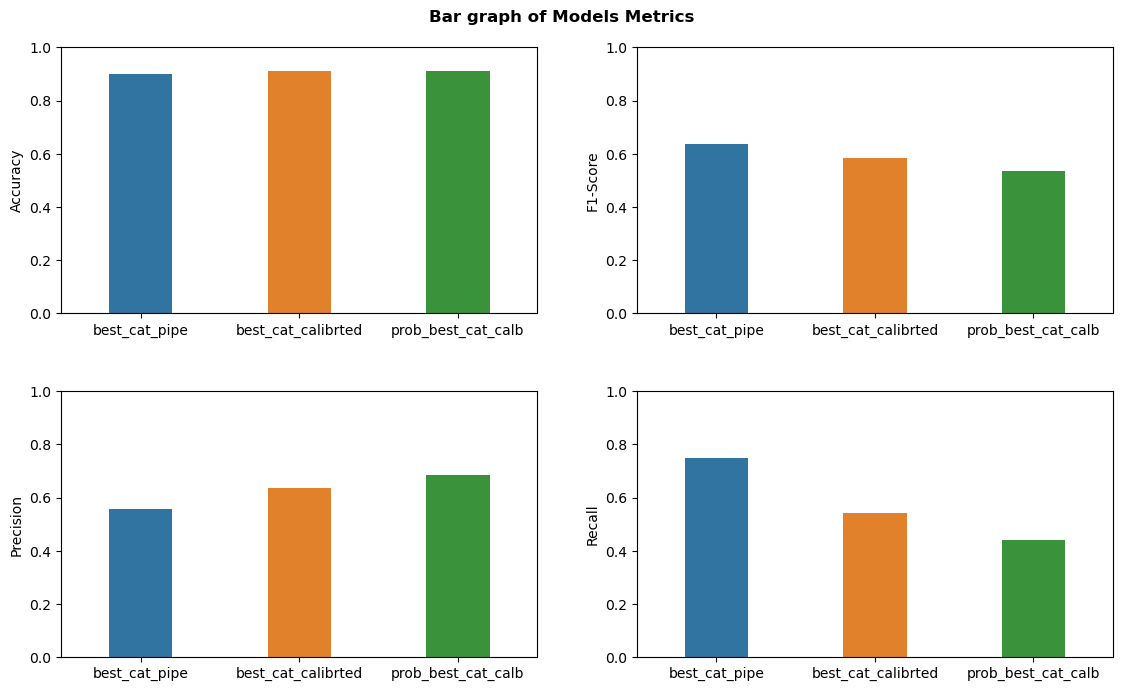

In [65]:
# Bar graph of each model for its metrics:
fig, axes = plt.subplots(nrows=2, ncols= 2, figsize=(12,8))
plt.suptitle('Bar graph of Models Metrics', fontsize=12, fontweight='bold', y=0.90)
for ax, col in zip(axes.flatten(), selected_final_models.drop('Model Name', axis=1).columns):
    sns.barplot(data=selected_final_models, x='Model Name', y = col, hue='Model Name', ax=ax, width=0.4, gap=0)
    # plt.xlabel('Model Name')
    ax.set_ylim(0,1)
    ax.set_xlabel('')
    plt.ylabel(col)
plt.tight_layout(pad=3.5)
plt.show()

In [66]:
# ROC/AUC curve for best 3 models we selected.
from sklearn.metrics import roc_curve, auc, precision_recall_curve

with capture_output(): 
    y_pred_prob_best_cat = best_cat_pipe.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_best_cat)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_best_cat)
roc_auc = auc(fpr, tpr)

In [132]:
roc_curve_df = pd.DataFrame(fpr, columns=['FPR'])
roc_curve_df['TPR'] = tpr
roc_curve_df.to_csv('Roc_Curve.csv', index=False)
Precision_Recall_df = pd.DataFrame(precision, columns=['Precision'], index=None)
Precision_Recall_df['Recall'] = recall
Precision_Recall_df.to_csv('Precision_Recall.csv', index=False)

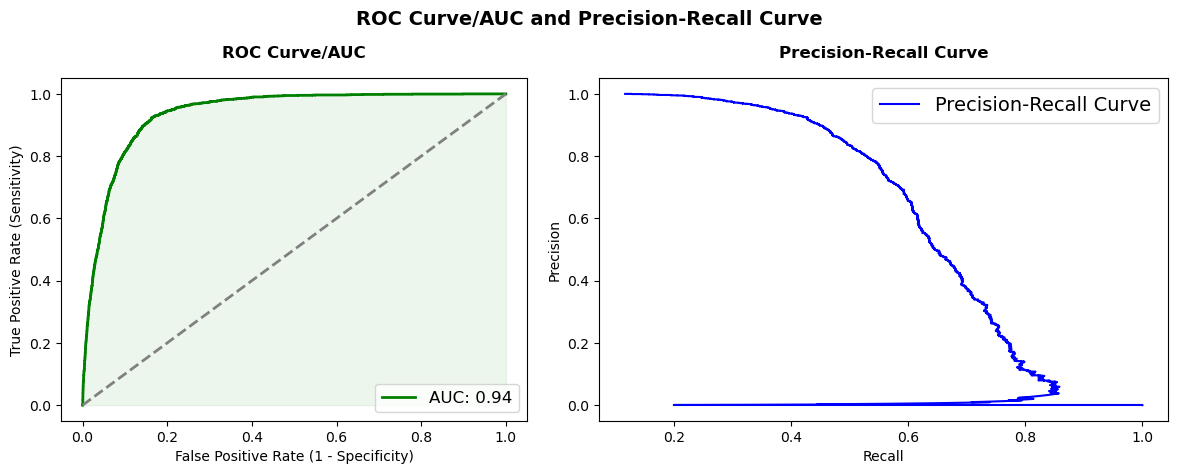

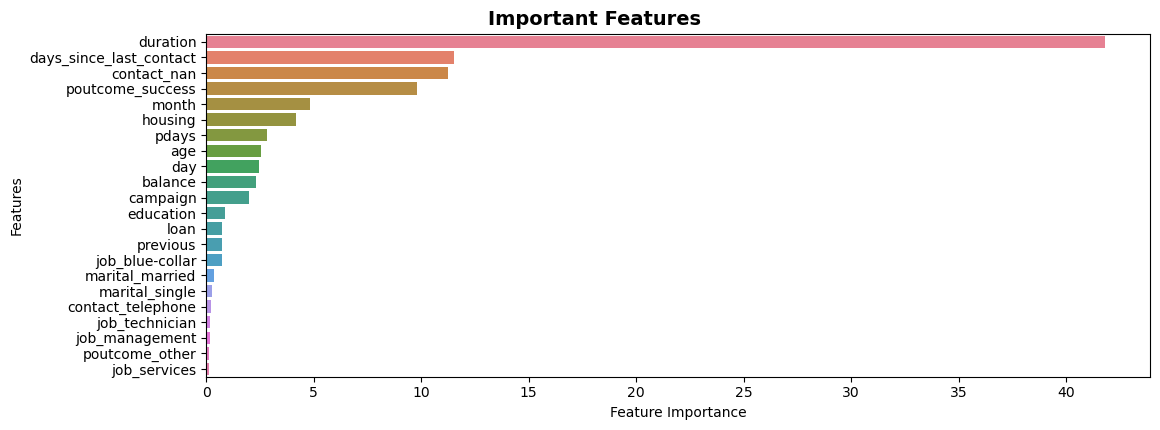

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5), gridspec_kw={'width_ratios': [0.45, 0.55]})
plt.suptitle('ROC Curve/AUC and Precision-Recall Curve', fontsize=14, fontweight='bold', y=0.95)
ax = axes.flatten()
ax[0].plot(fpr, tpr, color='green', linestyle='solid', linewidth=2, label=f'AUC: {roc_auc:.2f}')
ax[0].plot([0,1], [0,1], color='grey', linestyle='dashed', linewidth=2)
ax[0].set_xlabel('False Positive Rate (1 - Specificity)')
ax[0].set_ylabel('True Positive Rate (Sensitivity)')
ax[0].set_title('ROC Curve/AUC', fontweight='bold', pad=15)
ax[0].legend(loc="lower right",fontsize=12)
ax[0].fill_between(fpr, tpr, color='green', alpha=0.07)


ax[1].plot(precision, recall, color='blue', label='Precision-Recall Curve')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve', fontweight='bold', pad=15)
ax[1].legend(loc='upper right',fontsize=14)

plt.tight_layout(pad=1.5)
plt.show()

print('\n')
fi_df = pd.DataFrame()
fi_df['cols'] = [best_cat_pipe.steps[-1][1].feature_names_[i].split('__')[1] for i in range(len(best_cat_pipe.steps[-1][1].feature_names_))]
fi_df['importance'] = best_cat_pipe.steps[-1][1].feature_importances_
fi_df = fi_df.sort_values(by='importance', ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(data= fi_df, x='importance', y='cols', orient='h', hue='cols', legend=False, )
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.suptitle('Important Features', fontsize=14, fontweight='bold', y=0.9)

plt.tight_layout(rect=(0.0, 0.05, 0.975, 0.95))
plt.show()
# (left, bottom, right, top)

<h1 style="text-align: left; color:#32CD32">9. Optional Advanced Tasks </h1>

<h3 style="text-align: left; color:#4682B4;"> Task 30: Pickle the best models to disk. </h3>

In [68]:
import pickle

with open("best_cat_pipe.pkl", "wb") as f:
    pickle.dump(best_cat_pipe, f)

with open('best_cat_calibrted.pkl','wb') as f:
    pickle.dump(best_cat_calibrted, f)

<h3 style="text-align: left; color:#4682B4;"> Task 31: Load the pickled models to check their prediction. </h3>

In [73]:
# Load the model
model = pickle.load(open('best_cat_pipe.pkl', 'rb'))
t = pd.DataFrame(columns=X_train.columns)
test_file = pd.read_csv(r"G:\Data Science Eduminds\Projects\Banking\test.csv")
y_pred_app = model.predict(test_file)
print('Prediction Successful using best_cat_pipe Model:', y_pred_app)

	Binary Transform:		 Total Features: 16	 Total Samples: 46
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 46
	Feature Engineering:		 Total Features: 17	 Total Samples: 46
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 46
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 46
	Imputed Dataset:		 Total Features: 31	 Total Samples: 46
	After SelectKBest:		 Total Features: 30	 Total Samples: 46
	After RFE:			 Total Features: 24	 Total Samples: 46
	After Feature Importance:	 Total Features: 22	 Total Samples: 46

---------------------------------------------------------------------------------------------

Prediction Successful using best_cat_pipe Model: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0]


In [74]:
model = pickle.load(open('best_cat_calibrted.pkl', 'rb'))
t = pd.DataFrame(columns=X_train.columns)
test_file = pd.read_csv(r"G:\Data Science Eduminds\Projects\Banking\test.csv")
y_pred_app = model.predict(test_file)
print('Prediction Successful using best_cat_calibrted Model:', y_pred_app)

	Binary Transform:		 Total Features: 16	 Total Samples: 46
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 46
	Feature Engineering:		 Total Features: 17	 Total Samples: 46
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 46
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 46
	Imputed Dataset:		 Total Features: 31	 Total Samples: 46
	After SelectKBest:		 Total Features: 30	 Total Samples: 46
	After RFE:			 Total Features: 24	 Total Samples: 46
	After Feature Importance:	 Total Features: 21	 Total Samples: 46

---------------------------------------------------------------------------------------------

	Binary Transform:		 Total Features: 16	 Total Samples: 46
	Ordinary Feature Transform:	 Total Features: 16	 Total Samples: 46
	Feature Engineering:		 Total Features: 17	 Total Samples: 46
	Numerical Feature scaling:	 Total Features: 5	 Total Samples: 46
	Categorical Feature Transform:	 Total Features: 18	 Total Samples: 46
	Imputed Datase

<h3 style="text-align: left; color:#4682B4;"> Task 32: Deploy the model using a simple web application (e.g., Flask, Streamlit). </h3>

#### To deploy the Model using Streamlit followed below steps:
- Created simple Wellcome.html Page to give introduction to dataset and the goal.
- Also, included Model's description so that user can select preferred model.
- Create Prediction page to either accept manual input from user for all features or accept the uploaded csv file for prediction.
- Predict using preferred model and given inputs and provided prediction accordingly.

#### Python script:
- Preferref model is loaded into memory for a session and choosen below steps accordingly.
1. For option - Submit Features Manually:
   - Collected raw features into list and then converted them to Pandas Dataframe.
   - Provided it to selected model by user and returned prediction to Prediction page.
2. For option - Upload CSV:
   - Converted csv to Pandas Dataframe.
   - Provided it to selected model by user, combined prediction to csv and returned prediction to Prediction page to download.

<h1 style="text-align: left; color:#32CD32">10. Data Visualization with Tableau</h1> 

<h3 style="text-align: left; color:#4682B4;"> Task 33: Import the cleaned and preprocessed dataset into Tableau. </h3>


In [100]:
# Predict on X_test using selected models and attch it to X_test as model_name_pred column and export the csv file:
with capture_output():
    y_pred_best_cat_pipe = best_cat_pipe.predict(X_test)
    y_pred_best_cat_calibrted = best_cat_calibrted.predict(X_test)
    y_pred_prob = best_cat_calibrted.predict_proba(X_test)[:,1]
    y_pred_prob_best_cat_calb = (y_pred_prob >= 0.6).astype(int)

Tableau_dataset = X_test.copy()
Tableau_dataset['Actual_y'] = y_test
Tableau_dataset['y_pred_best_cat_pipe'] = y_pred_best_cat_pipe
Tableau_dataset['y_pred_best_cat_calibrted'] = y_pred_best_cat_calibrted
Tableau_dataset['y_pred_prob_best_cat_calb'] = y_pred_prob_best_cat_calb

# Tableau_dataset.to_csv('Tableau_dataset.csv', index=False)
Tableau_dataset.head(5)
fi_df.to_csv('Feature_Importance.csv', index=False)
top3_models_score.loc[[10,11,12]].to_csv('Top3_Model_Metrics.csv', index=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Actual_y,y_pred_best_cat_pipe,y_pred_best_cat_calibrted,y_pred_prob_best_cat_calb
38137,49,admin.,divorced,secondary,no,132,yes,no,cellular,15,may,98,1,350,1,failure,0,0,0,0
33021,35,admin.,single,secondary,no,0,yes,yes,telephone,20,nov,61,3,-1,0,unknown,0,0,0,0
31593,56,technician,single,secondary,no,3499,yes,no,unknown,29,may,248,3,-1,0,unknown,0,0,0,0
33832,41,blue-collar,married,primary,no,-692,yes,no,cellular,8,jul,125,2,-1,0,unknown,0,0,0,0
29788,29,management,married,tertiary,no,239,yes,no,unknown,30,may,143,4,-1,0,unknown,0,0,0,0


<h3 style="text-align: left; color:#4682B4;"> Task 34: Create interactive dashboards to visualize key insights from the data. </h3>


<h3 style="text-align: left; color:#4682B4;"> Task 35: Create interactive dashboards to visualize key insights from the data. </h3>



<h3 style="text-align: left; color:#4682B4;"> Task 36: Use Tableau features to allow dynamic exploration of the data. </h3>





<iframe src="https://public.tableau.com/views/BankMarketingDashboard_17429266364750/BankMarketingDashboard?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link" width="100%" height="600"></iframe>


In [121]:
# from IPython.display import display, HTML

# # JavaScript code to embed Tableau dashboard using Tableau JS API
# embed_code = """
# <div id="tableauViz"></div>
# <script type="text/javascript">
#    var viz;
#    var containerDiv = document.getElementById("tableauViz");
#    var url = "https://public.tableau.com/views/BankMarketingDashboard_17429266364750/BankMarketingDashboard?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link";
#    var options = {
#       width: "100%",
#       height: "600px"
#    };
#    viz = new tableau.Viz(containerDiv, url, options);
# </script>
# """

# display(HTML(embed_code))


In [123]:
from IPython.display import display, HTML

# Embed Tableau code
embed_code = """
<div class='tableauPlaceholder' id='viz1742930258726' style='position: relative'>
    <noscript>
        <a href='#'>
            <img alt=' ' src='https://public.tableau.com/static/images/Ba/BankMarketingDashboard_17429266364750/BankMarketingDashboard/1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz' style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
        <param name='embed_code_version' value='3' />
        <param name='site_root' value='' />
        <param name='name' value='BankMarketingDashboard_17429266364750/BankMarketingDashboard' />
        <param name='tabs' value='yes' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https://public.tableau.com/static/images/Ba/BankMarketingDashboard_17429266364750/BankMarketingDashboard/1.png' />
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='language' value='en-US' />
    </object>
</div>

<script type='text/javascript'>
    var divElement = document.getElementById('viz1742930258726');
    var vizElement = divElement.getElementsByTagName('object')[0];
    if ( divElement.offsetWidth > 800 ) { 
        vizElement.style.minWidth='1600px'; 
        vizElement.style.maxWidth='1600'; 
        vizElement.style.minHeight='950px'; 
        vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px'; 
    } else if ( divElement.offsetWidth > 500 ) { 
        vizElement.style.minWidth='1600px'; 
        vizElement.style.maxWidth='1600'; 
        vizElement.style.minHeight='950px'; 
        vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px'; 
    } else { 
        vizElement.style.width='100%'; 
        vizElement.style.minHeight='1700px'; 
        vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px'; 
    }
    var scriptElement = document.createElement('script');
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
    vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>
"""

# Display the embed code
display(HTML(embed_code))
